In [3]:
import pandas as pd

import matplotlib.pyplot as plt

In [4]:

df = pd.read_csv("ratings.csv")


In [5]:

# the full data 20ML file's     URL https://raw.githubusercontent.com/youssefekrami919/IRS-Assignment-1/refs/heads/main/ratings.csv
# the 1000 sample data file's   URL https://raw.githubusercontent.com/youssefekrami919/IRS-Assignment-1/main/ratings_Electronics%20(1000%20sample).csv
url = "https://raw.githubusercontent.com/youssefekrami919/IRS-Assignment-1/refs/heads/main/ratings.csv"
df = pd.read_csv(url)

print(df.head(10))


   userId  movieId  rating   timestamp
0       1        2     3.5  1112486027
1       1       29     3.5  1112484676
2       1       32     3.5  1112484819
3       1       47     3.5  1112484727
4       1       50     3.5  1112484580
5       1      112     3.5  1094785740
6       1      151     4.0  1094785734
7       1      223     4.0  1112485573
8       1      253     4.0  1112484940
9       1      260     4.0  1112484826


# Youssef **Ekrami**

### 1.Prepare a dataset of at least 100,000 users, > 1000 products, and > 1 million ratings.

In [6]:
# Count unique users manually
unique_users = {}
for row in df['userId']:
    if row not in unique_users:
        unique_users[row] = True
num_users = 0
for _ in unique_users:
    num_users += 1
print("Number of users:", num_users)


# Count unique items manually
unique_items = {}
for row in df['movieId']:
    if row not in unique_items:
        unique_items[row] = True
num_items = 0
for _ in unique_items:
    num_items += 1
print("Number of items:", num_items)


# Count ratings manually (without len)
num_ratings = 0
for _ in df['rating']:
    num_ratings += 1
print("Number of ratings:", num_ratings)


Number of users: 7120
Number of items: 14026
Number of ratings: 1048575


### 3. Calculate the number of ratings for each user (nu) and save it


In [7]:
nu = {}  # dictionary: userId -> count

# Loop through each row and count occurrences
for user in df['userId']:
    if user not in nu:
        nu[user] = 1
    else:
        nu[user] += 1

print("\nNumber of ratings per user (nu):")

# print first 5 users manually (not using head)
counter = 0
for user, count in nu.items():
    print(user, ":", count)
    counter += 1
    if counter == 5:
        break



Number of ratings per user (nu):
1 : 175
2 : 61
3 : 187
4 : 28
5 : 66


### 4. Calculate the number of ratings for each item (ni) and save it


In [8]:
# Step 1: Count ratings per item manually
ni = {}
for item in df['movieId']:
    if item not in ni:
        ni[item] = 1
    else:
        ni[item] += 1

# Step 2: Find the smallest movieId each time and print first 5
print("\nNumber of ratings per item (ni):")

printed = 0
used = []  # store printed keys to avoid repetition

while printed < 5:
    smallest = None
    
    # find smallest key not printed yet
    for key in ni:
        if key not in used and (smallest is None or key < smallest):
            smallest = key
    
    print(smallest, ni[smallest])
    used.append(smallest)
    printed += 1



Number of ratings per item (ni):
1 2569
2 1155
3 685
4 138
5 657


### 5. Compute the average ratings per user (ru) and save it


In [9]:
ru = {}      # sum of ratings per user
count = {}   # number of ratings per user

for i in range(len(df['userId'])):
    u = df['userId'][i]
    r = df['rating'][i]
    
    if u in ru:
        ru[u] = ru[u] + r
        count[u] = count[u] + 1
    else:
        ru[u] = r
        count[u] = 1

for u in ru:
    avg = ru[u] / count[u]
    ru[u] = round(avg, 2)   # round to 2 decimals



In [10]:
print("\nAverage ratings per user (ru):")

printed = 0
for u in ru:
    print(u, ":", ru[u])
    printed += 1
    if printed == 10:
        break



Average ratings per user (ru):
1 : 3.74
2 : 4.0
3 : 4.12
4 : 3.57
5 : 4.27
6 : 3.75
7 : 3.29
8 : 3.8
9 : 3.06
10 : 3.89


### 6. Compute the average ratings per item (ri) and save it


In [11]:
# Compute average rating per item (movieId)
ri = {}      # sum of ratings per item
count = {}   # number of ratings per item

for i in range(len(df['movieId'])):
    m = df['movieId'][i]
    r = df['rating'][i]
    
    if m in ri:
        ri[m] = ri[m] + r
        count[m] = count[m] + 1
    else:
        ri[m] = r
        count[m] = 1

for m in ri:
    avg = ri[m] / count[m]
    ri[m] = round(avg, 2)   # round to 2 decimals



In [12]:
print("\nAverage ratings per item (ri):")

printed = 0
for m in ri:
    print(m, ":", ri[m])
    printed += 1
    if printed == 10:
        break



Average ratings per item (ri):
2 : 3.27
29 : 4.0
32 : 3.9
47 : 4.08
50 : 4.37
112 : 3.37
151 : 3.51
223 : 3.88
253 : 3.5
260 : 4.19


### 7. Ascendingly order the total number of ratings per item and plot the distribution per item


Ratings per item sorted ascendingly:
60524 : 1
70227 : 1
59382 : 1
60482 : 1
2489 : 1
6955 : 1
4724 : 1
27359 : 1
27684 : 1
97324 : 1


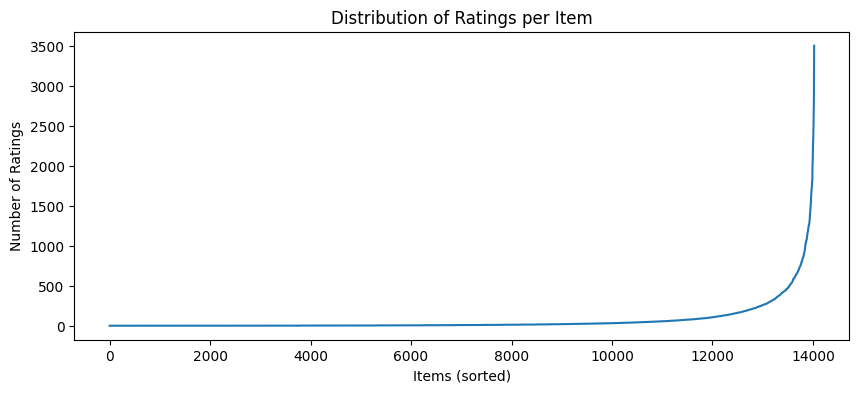

In [13]:
# ni dictionary already exists: movieId -> count

# Convert ni items to list of tuples
ni_items = []
for key in ni:
    ni_items.append((key, ni[key]))

# Merge Sort implementation to sort by count
def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    
    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    
    return merge(left, right)

def merge(left, right):
    result = []
    i = j = 0
    
    while i < len(left) and j < len(right):
        # Compare counts (index 1 in tuple)
        if left[i][1] <= right[j][1]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
            
    # Append leftovers
    result.extend(left[i:])
    result.extend(right[j:])
    
    return result

# Use merge sort
sorted_ni = merge_sort(ni_items)

# Print first 700
print("Ratings per item sorted ascendingly:")
for i in range(min(10, len(sorted_ni))):
    print(sorted_ni[i][0], ":", sorted_ni[i][1])

# Plotting
import matplotlib.pyplot as plt

counts = [item[1] for item in sorted_ni]

plt.figure(figsize=(10,4))
plt.plot(counts)
plt.title("Distribution of Ratings per Item")
plt.xlabel("Items (sorted)")
plt.ylabel("Number of Ratings")
plt.show()


### 8. Compute number of products based on their average ratings (percentage groups)


In [14]:
### 8. Compute the number of products based on their average ratings in Groups (G1 to G10)

# Initialize empty lists for each group to store the Movie IDs
# G1: <= 1%
# G2: 1% - 5%
# G3: 5% - 10%
# G4: 10% - 20%
# G5: 20% - 30%
# G6: 30% - 40%
# G7: 40% - 50%
# G8: 50% - 60% (Corrected from prompt context)
# G9: 60% - 70%
# G10: 70% - 100%

g1 = []
g2 = []
g3 = []
g4 = []
g5 = []
g6 = []
g7 = []
g8 = []
g9 = []
g10 = []

# Loop through the Average Ratings dictionary (ri) created in Task 6
for movie_id in ri:
    avg = ri[movie_id]
    
    # Calculate percentage (assuming max rating is 5.0)
    percent = (avg / 5.0) * 100
    
    # Check which group the product belongs to
    if percent <= 1:
        g1.append(movie_id)
    elif percent > 1 and percent <= 5:
        g2.append(movie_id)
    elif percent > 5 and percent <= 10:
        g3.append(movie_id)
    elif percent > 10 and percent <= 20:
        g4.append(movie_id)
    elif percent > 20 and percent <= 30:
        g5.append(movie_id)
    elif percent > 30 and percent <= 40:
        g6.append(movie_id)
    elif percent > 40 and percent <= 50:
        g7.append(movie_id)
    elif percent > 50 and percent <= 60:
        g8.append(movie_id)
    elif percent > 60 and percent <= 70:
        g9.append(movie_id)
    elif percent > 70 and percent <= 100:
        g10.append(movie_id)

# Print the number of products in each group
print("Number of products per group:")
print("G1 (<= 1%):", len(g1))
print("G2 (1-5%):", len(g2))
print("G3 (5-10%):", len(g3))
print("G4 (10-20%):", len(g4))
print("G5 (20-30%):", len(g5))
print("G6 (30-40%):", len(g6))
print("G7 (40-50%):", len(g7))
print("G8 (50-60%):", len(g8))
print("G9 (60-70%):", len(g9))
print("G10 (70-100%):", len(g10))

Number of products per group:
G1 (<= 1%): 0
G2 (1-5%): 0
G3 (5-10%): 183
G4 (10-20%): 195
G5 (20-30%): 260
G6 (30-40%): 605
G7 (40-50%): 1166
G8 (50-60%): 2486
G9 (60-70%): 3890
G10 (70-100%): 5241


G3: 183 
this means that there is 183 product each product of the 183 product its average rating is among the lowest 1% of all products’ average ratings. 

### 9. Compute the total number of ratings in each group and order them ascendingly


In [15]:
### 9. Compute the total number of ratings in each group and order them ascendingly

# Helper function to sum ratings for a list of items
# We use the 'ni' dictionary (number of ratings per item) from Task 4
def get_total_ratings(item_list, ni_dict):
    total = 0
    for movie_id in item_list:
        if movie_id in ni_dict:
            total = total + ni_dict[movie_id]
    return total

# Calculate totals for each group
t1 = get_total_ratings(g1, ni)
t2 = get_total_ratings(g2, ni)
t3 = get_total_ratings(g3, ni)
t4 = get_total_ratings(g4, ni)
t5 = get_total_ratings(g5, ni)
t6 = get_total_ratings(g6, ni)
t7 = get_total_ratings(g7, ni)
t8 = get_total_ratings(g8, ni)
t9 = get_total_ratings(g9, ni)
t10 = get_total_ratings(g10, ni)

# Create a list of lists to store [GroupName, TotalCount]
# This is our dataset to sort
group_data = [
    ["G1", t1], ["G2", t2], ["G3", t3], ["G4", t4], 
    ["G5", t5], ["G6", t6], ["G7", t7], ["G8", t8], 
    ["G9", t9], ["G10", t10]
]

# QuickSort Implementation (Best algorithm for time complexity O(n log n))
def quick_sort(arr):
    # Base case: if list is empty or has 1 item, it's already sorted
    if len(arr) <= 1:
        return arr
    
    pivot = arr[len(arr) // 2] # Choose middle element as pivot
    left = []
    middle = []
    right = []
    
    for x in arr:
        # Compare the count (index 1 of the inner list)
        if x[1] < pivot[1]:
            left.append(x)
        elif x[1] == pivot[1]:
            middle.append(x)
        else:
            right.append(x)
            
    # Recursive calls
    return quick_sort(left) + middle + quick_sort(right)

# Perform the sort
sorted_groups = quick_sort(group_data)

print("\nTotal ratings per group (Sorted Ascendingly):")
for item in sorted_groups:
    print(item[0], ":", item[1])


Total ratings per group (Sorted Ascendingly):
G1 : 0
G2 : 0
G3 : 201
G4 : 404
G5 : 1146
G6 : 7503
G7 : 27018
G8 : 114549
G9 : 290357
G10 : 607397


### 10. Plot the distribution before and after ordering


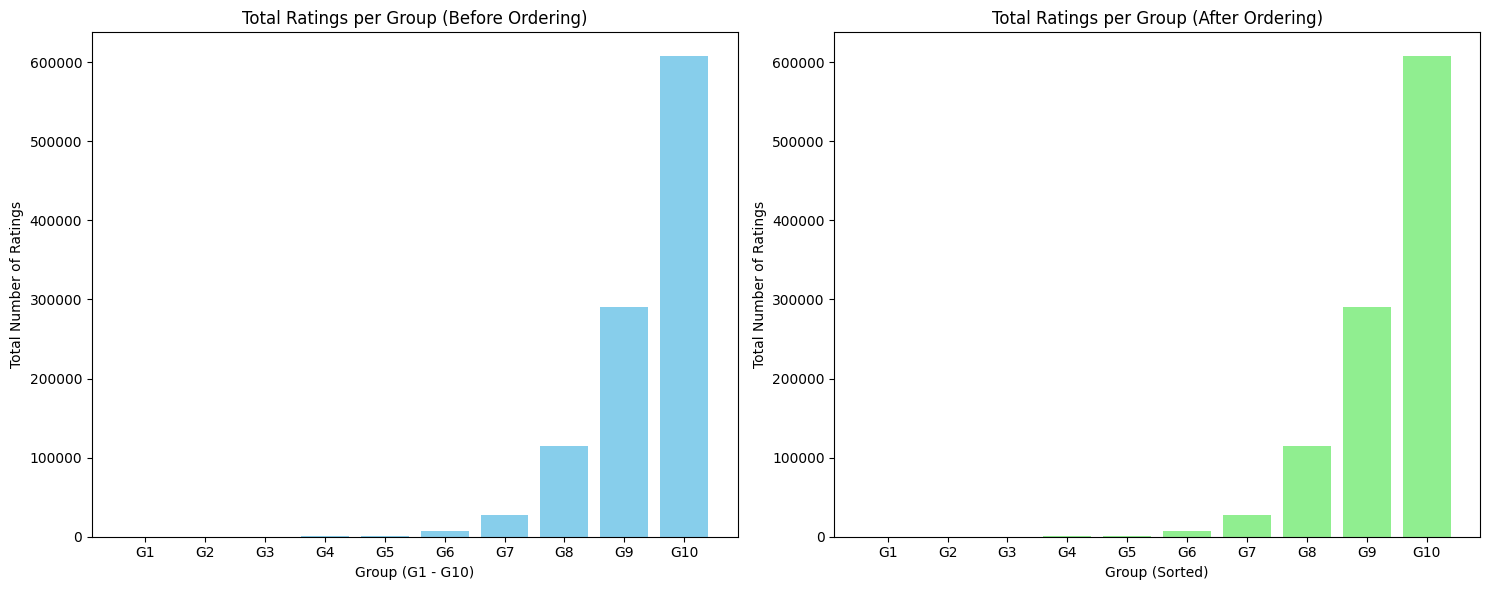

In [16]:
import matplotlib.pyplot as plt

# --- Prepare Data for Plotting ---

# 1. Before Ordering:
# We strictly follow the group order G1 to G10
labels_before = ["G1", "G2", "G3", "G4", "G5", "G6", "G7", "G8", "G9", "G10"]
# Map the group names to their totals calculated in Task 9
values_before = [
    get_total_ratings(g1, ni), get_total_ratings(g2, ni), 
    get_total_ratings(g3, ni), get_total_ratings(g4, ni),
    get_total_ratings(g5, ni), get_total_ratings(g6, ni), 
    get_total_ratings(g7, ni), get_total_ratings(g8, ni), 
    get_total_ratings(g9, ni), get_total_ratings(g10, ni)
]

# 2. After Ordering:
# We use the sorted_groups list we created in Task 9 using QuickSort
# sorted_groups structure is [['G_name', Total], ...]
labels_after = []
values_after = []

for item in sorted_groups:
    labels_after.append(item[0])
    values_after.append(item[1])

# --- Plotting ---

plt.figure(figsize=(15, 6))

# Subplot 1: Before Ordering
plt.subplot(1, 2, 1)
plt.bar(labels_before, values_before, color='skyblue')
plt.title("Total Ratings per Group (Before Ordering)")
plt.xlabel("Group (G1 - G10)")
plt.ylabel("Total Number of Ratings")

# Subplot 2: After Ordering (Ascending)
plt.subplot(1, 2, 2)
plt.bar(labels_after, values_after, color='lightgreen')
plt.title("Total Ratings per Group (After Ordering)")
plt.xlabel("Group (Sorted)")
plt.ylabel("Total Number of Ratings")

plt.tight_layout()
plt.show()

### 11. Select three target users based on their rating percentage


In [17]:

total_movies = df['movieId'].nunique()
user_rating_counts = df.groupby('userId').size()
user_percentage = (user_rating_counts / total_movies) * 100

# Find users in each required band
U1_cands = user_percentage[user_percentage <= 2]
U2_cands = user_percentage[(user_percentage > 2) & (user_percentage <= 5)]
U3_cands = user_percentage[(user_percentage > 5) & (user_percentage <= 10)]

# Pick one user from each (first one found)
U1 = U1_cands.index[0]
U2 = U2_cands.index[0] if len(U2_cands) > 0 else U1_cands.index[-1]  # fallback just in case
U3 = U3_cands.index[0] if len(U3_cands) > 0 else U2_cands.index[-1]

print("\n11. Selected Target Users:")
print(f"U1 (≤2% of movies rated)    → {U1} | rated {user_rating_counts[U1]} movies ({user_percentage[U1]:.4f}%)")
print(f"U2 (>2% ≤5%)                → {U2} | rated {user_rating_counts[U2]} movies ({user_percentage[U2]:.4f}%)")
print(f"U3 (>5% ≤10%)               → {U3} | rated {user_rating_counts[U3]} movies ({user_percentage[U3]:.4f}%)")

# Save for later use
target_users = [U1, U2, U3]
print("\nTarget users saved → you can now use them for recommendation experiments!")


11. Selected Target Users:
U1 (≤2% of movies rated)    → 1 | rated 175 movies (1.2477%)
U2 (>2% ≤5%)                → 11 | rated 504 movies (3.5933%)
U3 (>5% ≤10%)               → 54 | rated 710 movies (5.0620%)

Target users saved → you can now use them for recommendation experiments!


# Dareen Mosa

# Z-score normalization of users' average ratings

In [18]:
def round_val(x):
    return round(x, 2)

# part 1 point (1) and (2)
avg_ratings_list = []   

for u in unique_users:
    ratings_u = df[df['userId'] == u]['rating']
    avg_val = round_val(sum(ratings_u) / len(ratings_u)) 
    avg_ratings_list.append(avg_val)



N = len(avg_ratings_list)

# part 1 point (3)
# Calculate the sum of all average ratings
sum_ru = sum(avg_ratings_list)
# Calculate Mean
mu = round_val(sum_ru / N)

# part 1 ppoint (4)
sum_sq_diff = 0
# Calculate the sum of squared differences from the mean
for r_u in avg_ratings_list:
    diff = r_u - mu
    sum_sq_diff += diff * diff

# Calculate Standard Deviation
sigma = round_val((sum_sq_diff / N) ** 0.5)

# part 1 point (5)
normalized_ratings = []
for r_u in avg_ratings_list:
    if sigma == 0:
        z_u = 0.0
    else:
        # z_u = (ru - μ) / σ
        z_u = round_val((r_u - mu) / sigma)
    normalized_ratings.append(z_u)

# Z_u is the normalized feature vector (z_u)
Z_u = normalized_ratings

print(f"Number of Users (N): {N}")
print(f"Mean (μ) of Avg Ratings: {mu:.2f}")
print(f"Standard Deviation (σ) of Avg Ratings: {sigma:.2f}")
print("First 10 Normalized Avg Ratings (z_u):")
print([f"{z:.2f}" for z in Z_u[:10]])

Number of Users (N): 7120
Mean (μ) of Avg Ratings: 3.62
Standard Deviation (σ) of Avg Ratings: 0.45
First 10 Normalized Avg Ratings (z_u):
['0.27', '0.84', '1.11', '-0.11', '1.44', '0.29', '-0.73', '0.40', '-1.24', '0.60']


# Apply K-means clustering 

In [19]:
# Helper function for squared distance (for WCSS)
def squared_distance(point, centroid):
    return (point - centroid) ** 2
#part 1 point (6.1)
# Manual K-means Implementation
def run_kmeans_manual(data, K, max_iters=100):
    # Initialization: Use the first K points as initial centroids 
    centroids = [round_val(data[i]) for i in range(K)]

    for iteration in range(max_iters):
        #Assign each point to the nearest centroid
        assignments = [[] for _ in range(K)]
        user_labels = [0] * len(data)
        
        for i, point in enumerate(data):
            min_dist = float('inf')
            best_cluster = -1
            
            for j, centroid in enumerate(centroids):
                dist = squared_distance(point, centroid)
                if dist < min_dist:
                    min_dist = dist
                    best_cluster = j
            
            assignments[best_cluster].append(point)
            user_labels[i] = best_cluster

        #  Calculate new centroids (mean of assigned points)
        new_centroids = []
        for cluster_points in assignments:
            if len(cluster_points) > 0:
                new_centroid = round_val(sum(cluster_points) / len(cluster_points))
            else:
                # Keep old centroid if cluster is empty
                new_centroid = centroids[assignments.index(cluster_points)]
            new_centroids.append(new_centroid)
        
        # Stop if centroids do not change (rounded values)
        converged = True
        for old, new in zip(centroids, new_centroids):
            if round_val(old) != round_val(new):
                converged = False
                break
        
        centroids = new_centroids
        
        if converged:
            break

    # alculate WCSS (Inertia)
    wcss_value = 0
    for i, cluster_points in enumerate(assignments):
        centroid = centroids[i]
        for point in cluster_points:
            wcss_value += squared_distance(point, centroid)
    
    return centroids, user_labels, round_val(wcss_value)

# Manual Silhouette Score Implementation
def calculate_silhouette_score_manual(data, labels):
    if len(set(labels)) <= 1 or len(data) <= 1:
        return 0.0

    scores = []
    
    for i, point in enumerate(data):
        cluster_i = labels[i]
        
        #  average distance to all other points in the same cluster
        intra_cluster_dists = []
        for j, other_point in enumerate(data):
            if i != j and labels[j] == cluster_i:
                # Use absolute difference for 1D distance
                intra_cluster_dists.append(abs(point - other_point))
        
        a_i = round_val(sum(intra_cluster_dists) / len(intra_cluster_dists)) if intra_cluster_dists else 0.0
        
        #  minimum average distance to points in any other cluster
        other_clusters = set(labels) - {cluster_i}
        b_i = float('inf')
        
        if other_clusters:
            for other_cluster in other_clusters:
                inter_cluster_dists = []
                for j, other_point in enumerate(data):
                    if labels[j] == other_cluster:
                        inter_cluster_dists.append(abs(point - other_point))
                
                if inter_cluster_dists:
                    avg_dist = round_val(sum(inter_cluster_dists) / len(inter_cluster_dists))
                    b_i = min(b_i, avg_dist)
        
        # Calculate s(i)
        if b_i == float('inf') or a_i == b_i:
            s_i = 0.0
        elif a_i < b_i:
            s_i = round_val((b_i - a_i) / b_i)
        else: # a_i > b_i
            s_i = round_val((b_i - a_i) / a_i)
            
        scores.append(s_i)
    
    # Final Silhouette Score is the average of all s(i)
    final_score = round_val(sum(scores) / len(scores))
    return final_score

# part 1 point (6.2)
K_values = [5, 10, 15, 20, 30, 50]
wcss = []
silhouette_scores = {}
cluster_results = {}

for K in K_values:
    centroids, labels, wcss_val = run_kmeans_manual(Z_u, K)
    wcss.append(wcss_val)
    
    # Calculate Silhouette Score
    score = calculate_silhouette_score_manual(Z_u, labels)
    silhouette_scores[K] = score
    
    # Store results
    cluster_results[K] = {
        'centroids': centroids,
        'labels': labels
    }
        
    print(f"K={K:2}: WCSS = {wcss_val:.2f}, Silhouette Score = {score:.2f}")

# Create DataFrame for summary display
results_df = pd.DataFrame({
    'K': K_values,
    'WCSS': wcss
})
results_df['Silhouette Score'] = results_df['K'].map(silhouette_scores)
print("\nPerformance Summary:")
print(results_df.to_markdown(index=False, numalign="left", stralign="left"))

K= 5: WCSS = 699.81, Silhouette Score = 0.52
K=10: WCSS = 227.99, Silhouette Score = 0.51
K=15: WCSS = 114.08, Silhouette Score = 0.51
K=20: WCSS = 79.17, Silhouette Score = 0.53
K=30: WCSS = 58.86, Silhouette Score = 0.54
K=50: WCSS = 38.82, Silhouette Score = 0.57

Performance Summary:
| K   | WCSS   | Silhouette Score   |
|:----|:-------|:-------------------|
| 5   | 699.81 | 0.52               |
| 10  | 227.99 | 0.51               |
| 15  | 114.08 | 0.51               |
| 20  | 79.17  | 0.53               |
| 30  | 58.86  | 0.54               |
| 50  | 38.82  | 0.57               |


# Display user distribution for the best K

K=5: Cluster distribution = Counter({1: 2289, 2: 1877, 0: 1624, 4: 886, 3: 444})
K=10: Cluster distribution = Counter({0: 1217, 5: 1207, 7: 1082, 3: 888, 9: 816, 1: 699, 2: 518, 6: 404, 4: 194, 8: 95})
K=15: Cluster distribution = Counter({3: 843, 12: 843, 0: 831, 11: 679, 13: 615, 7: 510, 1: 483, 10: 474, 9: 445, 5: 397, 6: 357, 2: 351, 14: 156, 4: 103, 8: 33})
K=20: Cluster distribution = Counter({11: 593, 3: 581, 15: 538, 17: 501, 19: 431, 10: 425, 12: 424, 1: 416, 0: 414, 18: 392, 16: 387, 9: 359, 13: 331, 6: 304, 2: 302, 7: 279, 5: 201, 14: 128, 4: 85, 8: 29})
K=30: Cluster distribution = Counter({19: 475, 23: 459, 25: 442, 1: 414, 10: 408, 6: 376, 16: 356, 15: 305, 2: 302, 9: 295, 20: 289, 14: 284, 7: 279, 11: 259, 22: 247, 24: 246, 17: 221, 5: 201, 12: 195, 8: 189, 21: 152, 18: 139, 3: 124, 26: 120, 29: 93, 4: 85, 0: 77, 13: 59, 27: 29})
K=50: Cluster distribution = Counter({2: 304, 44: 297, 49: 293, 42: 282, 7: 279, 6: 277, 16: 271, 14: 261, 34: 224, 25: 222, 8: 213, 5: 201, 24

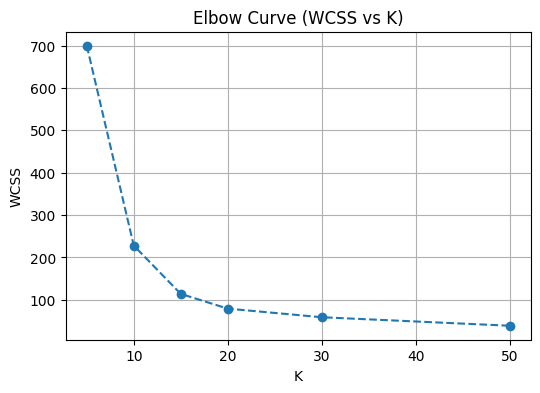

K=5: Silhouette Score=0.52
K=10: Silhouette Score=0.51
K=15: Silhouette Score=0.51
K=20: Silhouette Score=0.53
K=30: Silhouette Score=0.54
K=50: Silhouette Score=0.57


In [20]:
# (7.1) calculate the number of users in each cluster
from collections import Counter
for K in K_values:
    labels = cluster_results[K]['labels']
    dist = Counter(labels)
    print(f"K={K}: Cluster distribution = {dist}")

# (7.2) Compute the within-cluster sum of squares (WCSS) for each K
def calculate_wcss(data, centroids, labels):
    return round_val(sum((p - centroids[l])**2 for p,l in zip(data,labels)))

wcss = []
for K in K_values:
    c = cluster_results[K]['centroids']
    l = cluster_results[K]['labels']
    wcss_val = calculate_wcss(Z_u, c, l)
    wcss.append(wcss_val)
    print(f"K={K}: WCSS={wcss_val}")

#( 7.3) Plot the elbow curve (WCSS vs. K) to determine the optimal K value
plt.figure(figsize=(6,4))
plt.plot(K_values, wcss, marker='o', linestyle='--')
plt.title("Elbow Curve (WCSS vs K)")
plt.xlabel("K")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

# (7.4) Calculate the silhouette score for each K value to assess clustering quality
def silhouette_score(data, labels):
    scores=[]
    for i,p in enumerate(data):
        same=[abs(p-data[j]) for j in range(len(data)) if labels[j]==labels[i] and j!=i]
        a=sum(same)/len(same) if same else 0
        other_clusters=set(labels)-{labels[i]}
        b=min(sum(abs(p-data[j]) for j in range(len(data)) if labels[j]==oc)/len([j for j in range(len(data)) if labels[j]==oc]) for oc in other_clusters) if other_clusters else a
        s=(b-a)/max(a,b) if max(a,b)>0 else 0
        scores.append(s)
    return round_val(sum(scores)/len(scores))

sil_scores = {}
for K in K_values:
    l = cluster_results[K]['labels']
    score = silhouette_score(Z_u, l)
    sil_scores[K] = score
    print(f"K={K}: Silhouette Score={score}")

# Cluster Analysis

In [23]:
# Define the optimal K based on elbow + silhouette analysis
OPTIMAL_K = 10

user_ids_list = list(unique_users)

# Cluster Distribution and Centroid Analysis (for Optimal K=10)

# Get optimal results
optimal_labels = cluster_results[OPTIMAL_K]['labels']
optimal_centroids_normalized = cluster_results[OPTIMAL_K]['centroids']

# Create mapping from userId to cluster label
user_cluster_map = {user_ids_list[i]: optimal_labels[i] for i in range(N)}


# (8.1) User Distribution Across Clusters 

cluster_distribution = {}
for label in optimal_labels:
    cluster_distribution[label] = cluster_distribution.get(label, 0) + 1

# Convert to DataFrame for display, sorting by cluster index
dist_data = sorted(cluster_distribution.items())
dist_df = pd.DataFrame(dist_data, columns=['Cluster', 'User Count'])

print(f"# User Distribution Across Clusters (K={OPTIMAL_K}) #")
print(dist_df.to_markdown(index=False, numalign="left", stralign="left"))

# (8.2) Centroid Values — Denormalize back to Average Rating scale (r̄u = z_u * σ + μ)
centroids_data = []
for i in range(OPTIMAL_K):
    z_u = optimal_centroids_normalized[i]
    # Denormalization formula: r̄u = z_u * σ + μ
    avg_r = round_val(z_u * sigma + mu)
    
    centroids_data.append([
        i, 
        round_val(z_u), 
        avg_r
    ])

centroids_df = pd.DataFrame(centroids_data, 
                            columns=['Cluster', 'Normalized Centroid (z_u)', 'Average Rating Centroid (r̄u)'])

# Sort by Average Rating Centroid to identify strict vs. generous raters
centroids_df = centroids_df.sort_values(by='Average Rating Centroid (r̄u)', ascending=True).reset_index(drop=True)

print(f"\n# Cluster Centroids  for K={OPTIMAL_K} #")
print(centroids_df.to_markdown(index=False, numalign="left", stralign="left"))


# (8.3) Identify Strict vs. Generous Raters

strict_clusters = centroids_df.head(2)['Cluster'].tolist()
generous_clusters = centroids_df.tail(2)['Cluster'].tolist()

print("\n# Cluster Characterization #")
print(f"Strict Raters Clusters (Lowest Avg Ratings): {strict_clusters}")
print(f"Generous Raters Clusters (Highest Avg Ratings): {generous_clusters}")

# Store cluster data for CF step
cluster_sizes = cluster_distribution

# User Distribution Across Clusters (K=10) #
| Cluster   | User Count   |
|:----------|:-------------|
| 0         | 1217         |
| 1         | 699          |
| 2         | 518          |
| 3         | 888          |
| 4         | 194          |
| 5         | 1207         |
| 6         | 404          |
| 7         | 1082         |
| 8         | 95           |
| 9         | 816          |

# Cluster Centroids  for K=10 #
| Cluster   | Normalized Centroid (z_u)   | Average Rating Centroid (r̄u)   |
|:----------|:----------------------------|:-------------------------------|
| 8         | -3.43                       | 2.08                           |
| 6         | -1.9                        | 2.77                           |
| 3         | -1.06                       | 3.14                           |
| 0         | -0.49                       | 3.4                            |
| 5         | -0.05                       | 3.6                            |
| 7         | 0.32                

# Cluster-based CF

In [25]:
# (9.1) Identify which cluster each target user belongs to
target_users = [1, 11, 54]   
target_items = [260, 60524]  
top_k_percent = 20           # Select top 20% neighbors

for u in target_users:
    cluster_id = user_cluster_map.get(u, 'N/A')
    print(f"Target User {u} belongs to Cluster {cluster_id}")

# (9.2) Compute user-user similarity within the assigned cluster using mean-centered Cosine similarity
def mean_centered_cosine_similarity_manual(user1, user2, centered_ratings):
    if user1 not in centered_ratings or user2 not in centered_ratings:
        return 0.0
    r_u = centered_ratings[user1]
    r_v = centered_ratings[user2]
    common_items = set(r_u.keys()) & set(r_v.keys())
    if not common_items:
        return 0.0
    numerator = sum(r_u[it] * r_v[it] for it in common_items)
    sum_u_sq = sum(r_u[it]**2 for it in common_items)
    sum_v_sq = sum(r_v[it]**2 for it in common_items)
    denominator = (sum_u_sq**0.5) * (sum_v_sq**0.5)
    return round_val(numerator/denominator) if denominator != 0 else 0.0

# (9.3) Select the top 20% most similar users from within the same cluster
def get_top_similar_users(target_user, cluster_id, top_percent=0.2):
    similarities = []
    for u in user_cluster_map:
        if user_cluster_map[u] == cluster_id and u != target_user:
            sim = mean_centered_cosine_similarity_manual(target_user, u, user_ratings_centered)
            if sim > 0:
                similarities.append((u, sim))
    similarities.sort(key=lambda x: x[1], reverse=True)
    top_k = int(len(similarities) * top_percent)
    return similarities[:max(1, top_k)]

# (9.4) Predict ratings for target items using only the similar users from the same cluster
def predict_rating_cluster_cf_manual(target_user, target_item, cluster_map, centered_ratings, avg_ratings_map, top_k_percentage):
    if target_user not in cluster_map:
        return avg_ratings_map.get(target_user, 3.5), 0
    cluster_id = cluster_map[target_user]
    avg_r_u = avg_ratings_map.get(target_user, 3.5)
    neighbors = get_top_similar_users(target_user, cluster_id, top_k_percentage/100)
    num, den = 0.0, 0.0
    for n, sim in neighbors:
        if target_item in centered_ratings.get(n, {}):
            num += sim * centered_ratings[n][target_item]
            den += abs(sim)
    if den == 0:
        return avg_r_u, len(neighbors)
    prediction = round_val(avg_r_u + num/den)
    return max(0.5, min(5.0, prediction)), len(neighbors)

# Execute predictions for each target user and item
predictions_cf_cluster = {}
for u in target_users:
    predictions_cf_cluster[u] = {}
    for it in target_items:
        pred, k_neighbors = predict_rating_cluster_cf_manual(u, it, user_cluster_map, user_ratings_centered, ru, top_k_percent)
        predictions_cf_cluster[u][it] = (pred, k_neighbors)

# Display results
rows = []
for u, items in predictions_cf_cluster.items():
    for it, (pred, k_n) in items.items():
        rows.append({
            'User': u,
            'Item': it,
            'Cluster': user_cluster_map.get(u, 'N/A'),
            'Prediction': pred,
            'Neighbors Used': k_n
        })

cf_cluster_df = pd.DataFrame(rows)
print("\n### Cluster-based CF Predictions (Part 1) ###")
print(cf_cluster_df.to_markdown(index=False, numalign="left", stralign="left"))

Target User 1 belongs to Cluster 7
Target User 11 belongs to Cluster 9
Target User 54 belongs to Cluster 0

### Cluster-based CF Predictions (Part 1) ###
| User   | Item   | Cluster   | Prediction   | Neighbors Used   |
|:-------|:-------|:----------|:-------------|:-----------------|
| 1      | 260    | 7         | 4.46         | 142              |
| 1      | 60524  | 7         | 3.74         | 142              |
| 11     | 260    | 9         | 4.83         | 110              |
| 11     | 60524  | 9         | 3.95         | 110              |
| 54     | 260    | 0         | 4.48         | 193              |
| 54     | 60524  | 0         | 3.44         | 193              |


# Compare clustering-based predictions vs non-clustering baseline (Section TWO)


In [30]:
# ============================
# (10) Compare baseline vs clustering predictions
# ============================

comparison_results = []

for u in target_users:
    for i in target_items:
        
        # ---- (10.1) baseline prediction (from section TWO)
        baseline_pred, _ = predict_rating_baseline_cf_manual(
            u, i, user_ratings_centered, ru, top_k_percent
        )
        
        # ---- (10.1) cluster-based prediction
        cluster_pred, _ = predictions_cf_cluster[u][i]
        
        
        # ---- (10.2) difference
        diff = round(cluster_pred - baseline_pred, 4)
        
        comparison_results.append({
            "User": u,
            "Item": i,
            "Baseline": baseline_pred,
            "Cluster": cluster_pred,
            "Difference": diff
        })

# convert to dataframe for viewing
comparison_df = pd.DataFrame(comparison_results)

print("\n### 10.1 & 10.2 Prediction Comparison ###")
display(comparison_df)


# ============================
# (10.3) Discussion per user-item
# ============================
print("\n### 10.3 Accuracy Discussion ###")
for row in comparison_results:
    u = row["User"]
    i = row["Item"]
    diff = row["Difference"]
    
    # threshold to interpret improvement
    if abs(diff) < 0.2:
        status = "Maintained (no significant change)"
    elif diff > 0:
        status = "Improved (cluster > baseline)"
    else:
        status = "Degraded (cluster < baseline)"
    
    print(f"User {u}, Item {i}: {status}")


NameError: name 'predict_rating_baseline_cf_manual' is not defined

# Manual Feature Construction: Common Ratings Overlap

In [34]:

# The original DataFrame 'df' is required here to calculate common items.

# 1. Pre-calculate user item sets
user_items = {} # {userId: {movieId1, movieId2, ...}}
for index, row in df[['userId', 'movieId']].iterrows():
    u = row['userId']
    m = row['movieId']
    if u not in user_items:
        user_items[u] = set()
    user_items[u].add(m)

user_ids = list(ru.keys()) # All users
N = len(user_ids)

# 2. Calculate Overlap Features for each user (avg, max, min common items)
feature_data = {} # {userId: [avg_common, max_common, min_common]}

# We will iterate over all user pairs (u, v)
for i, u in enumerate(user_ids):
    u_items = user_items[u]
    common_counts = [] # List of |I_u ∩ I_v| for all v != u

    for j, v in enumerate(user_ids):
        if u != v:
            v_items = user_items[v]
            # Manual intersection size calculation
            common_count = len(u_items.intersection(v_items))
            common_counts.append(common_count)
    
    # Calculate Features manually (rounded to 2 decimals)
    
    # Feature 1: Average common items (avg_common)
    avg_common = round_val(sum(common_counts) / len(common_counts))
    
    # Feature 2: Maximum common items (max_common)
    max_common = max(common_counts)
    
    # Feature 3: Minimum common items (min_common, excluding zero)
    # Filter out zeros first
    non_zero_common = [c for c in common_counts if c > 0]
    min_common = min(non_zero_common) if non_zero_common else 0
    
    feature_data[u] = [avg_common, max_common, min_common]

# Convert feature data to a list of vectors F_u for normalization
F_u = [feature_data[u] for u in user_ids]

print(f"Number of Users (N): {N}")
print("First 5 Feature Vectors [avg_common, max_common, min_common]:")
for u_id in user_ids[:5]:
    print(f"User {u_id}: {feature_data[u_id]}")

Number of Users (N): 7120
First 5 Feature Vectors [avg_common, max_common, min_common]:
User 1: [18.56, 147, 1]
User 2: [6.24, 54, 1]
User 3: [21.27, 182, 1]
User 4: [5.26, 28, 1]
User 5: [13.17, 65, 1]


In [40]:
# Cell 7 — Part1: Computational Efficiency & Imbalance Analysis

# Total users
N_total = N

# Cluster sizes list
cluster_sizes_list = list(cluster_sizes.values()) if cluster_sizes else [1]
avg_cluster_size = round_val(sum(cluster_sizes_list) / len(cluster_sizes_list))

# --- 1. Similarity Operations (per user) ---
similarity_ops_non_clustering = N_total - 1  # per-user comparisons in full search
similarity_ops_with_clustering_avg = avg_cluster_size - 1  # per-user (avg) within cluster

print("### Computational Efficiency Analysis ###")
print(f"Total Users (N): {N_total}")
print(f"Average Cluster Size (|C̄u|): {avg_cluster_size:.2f}")

print("\n1. Similarity Operations Comparison (per user):")
print(f"   - Non-Clustering: {similarity_ops_non_clustering} operations.")
print(f"   - Cluster-based (Avg): {similarity_ops_with_clustering_avg:.2f} operations.")

# --- 2. Speedup Factor & Reduction Percentage (per user) ---
if similarity_ops_with_clustering_avg == 0:
    speedup_factor = float('inf')
    reduction_percentage = 100.0
else:
    speedup_factor = round_val(similarity_ops_non_clustering / similarity_ops_with_clustering_avg)
    reduction_percentage = round_val(100 * (1 - (similarity_ops_with_clustering_avg / similarity_ops_non_clustering)))

print(f"\n2. Speedup Factor (per user): {speedup_factor}x")
print(f"3. Reduction Percentage in Operations (per user): {reduction_percentage}%")

# --- 3. Cluster Imbalance ---
imbalance_ratio = round_val(max(cluster_sizes_list) / min(cluster_sizes_list)) if min(cluster_sizes_list) > 0 else float('inf')
print(f"\n4. Cluster Imbalance Ratio (Max Size / Min Size): {imbalance_ratio}x")
print("Suggestions to handle imbalance: reduce K, use stratified K, merge tiny clusters, or recluster with different init.")

# --- 4. Global Efficiency Analysis ---
total_pairs_no_cluster = N_total * (N_total - 1) // 2
cluster_sizes_vals = list(cluster_sizes.values())
total_pairs_with_cluster = sum(n * (n - 1) // 2 for n in cluster_sizes_vals)

if total_pairs_with_cluster == 0:
    global_speedup = float('inf')
    global_reduction_pct = 100.0
else:
    global_speedup = round_val(total_pairs_no_cluster / total_pairs_with_cluster)
    global_reduction_pct = round_val(100 * (1 - (total_pairs_with_cluster / total_pairs_no_cluster)))

print("\n=== Global Efficiency (Pairwise) ===")
print(f"Total pairs (no clustering): {total_pairs_no_cluster}")
print(f"Total pairs (with clustering): {total_pairs_with_cluster}")
print(f"Global speedup: {global_speedup}x")
print(f"Global reduction in computations: {global_reduction_pct}%")

### Computational Efficiency Analysis ###
Total Users (N): 7120
Average Cluster Size (|C̄u|): 712.00

1. Similarity Operations Comparison (per user):
   - Non-Clustering: 7119 operations.
   - Cluster-based (Avg): 711.00 operations.

2. Speedup Factor (per user): 10.01x
3. Reduction Percentage in Operations (per user): 90.01%

4. Cluster Imbalance Ratio (Max Size / Min Size): 12.81x
Suggestions to handle imbalance: reduce K, use stratified K, merge tiny clusters, or recluster with different init.

=== Global Efficiency (Pairwise) ===
Total pairs (no clustering): 25343640
Total pairs (with clustering): 3261372
Global speedup: 7.77x
Global reduction in computations: 87.13%


 # Manual Feature Construction and Z-score Normalization (Part 2)

In [34]:
# Cell 1: Manual Feature Construction and Z-score Normalization (Part 2)

# Global variables assumed available: df, user_ids, round_val, N

# 1. Pre-calculate user item sets
user_items = {} # {userId: {movieId1, movieId2, ...}}
for index, row in df[['userId', 'movieId']].iterrows():
    u = row['userId']
    m = row['movieId']
    if u not in user_items:
        user_items[u] = set()
    user_items[u].add(m)

user_ids_list = list(user_items.keys()) # All users
N = len(user_ids_list)

# 2. Calculate Overlap Features for each user
feature_data_overlap = {} # {userId: [avg_common, max_common, min_common]}
F_u = [] # List of feature vectors for normalization

for i, u in enumerate(user_ids_list):
    u_items = user_items[u]
    common_counts = [] # List of |I_u ∩ I_v| for all v != u

    for j, v in enumerate(user_ids_list):
        if u != v:
            v_items = user_items[v]
            common_count = len(u_items.intersection(v_items))
            common_counts.append(common_count)
    
    # Feature 1: Average common items (avg_common)
    avg_common = round_val(sum(common_counts) / len(common_counts))
    
    # Feature 2: Maximum common items (max_common)
    max_common = max(common_counts)
    
    # Feature 3: Minimum common items (min_common, excluding zero)
    non_zero_common = [c for c in common_counts if c > 0]
    min_common = min(non_zero_common) if non_zero_common else 0
    
    vector = [avg_common, max_common, min_common]
    feature_data_overlap[u] = vector
    F_u.append(vector)


# 3. Manual Z-score Normalization for 3 Dimensions
D = 3 
# Calculate Mean (μ)
mu_vec = [round_val(sum(vector[d] for vector in F_u) / N) for d in range(D)]

# Calculate Standard Deviation (σ)
sigma_vec = [round_val((sum((vector[d] - mu_vec[d]) ** 2 for vector in F_u) / N) ** 0.5) for d in range(D)]

# Normalize
Z_u_part2 = []
for vector in F_u:
    z_vector = []
    for d in range(D):
        if sigma_vec[d] == 0:
            z_val = 0.0
        else:
            z_val = round_val((vector[d] - mu_vec[d]) / sigma_vec[d])
        z_vector.append(z_val)
    Z_u_part2.append(z_vector)

# Sanity prints
print("Mean vector (mu):", mu_vec)
print("Std vector (sigma):", sigma_vec)
print("First 5 normalized vectors (z):")
for i in range(min(5, len(Z_u_part2))):
    print(user_ids_list[i], Z_u_part2[i])


Mean vector (mu): [14.7, 120.62, 1.0]
Std vector (sigma): [14.56, 153.09, 0.09]
First 5 normalized vectors (z):
1 [0.27, 0.17, 0.0]
2 [-0.58, -0.44, 0.0]
3 [0.45, 0.4, 0.0]
4 [-0.65, -0.61, 0.0]
5 [-0.11, -0.36, 0.0]


#  K-means Clustering and Performance Analysis (3D)

In [35]:
# Cell 10 — Part2: K-means (3D) functions + K loop (WCSS, silhouette)

# 3D squared distance
def squared_distance_3d(a, b):
    # a, b are lists of length 3
    return (a[0]-b[0])**2 + (a[1]-b[1])**2 + (a[2]-b[2])**2

# K-means for 3D (from scratch)
import random

def run_kmeans_manual_3d(data, K, max_iters=100, init='first', random_state=None):
    L = len(data)
    if K <= 0 or L == 0:
        return [], [0]*L, 0.0
    if init == 'random':
        rnd = random.Random(random_state)
        indices = rnd.sample(range(L), min(K, L))
        centroids = [ [round_val(data[i][d]) for d in range(3)] for i in indices ]
        # pad if K > L
        while len(centroids) < K:
            centroids.append([round_val(data[0][d]) for d in range(3)])
    else:
        centroids = [ [round_val(data[i][d]) for d in range(3)] for i in range(min(K, L)) ]
        while len(centroids) < K:
            centroids.append([round_val(data[0][d]) for d in range(3)])

    labels = [0]*L
    for _ in range(max_iters):
        # Assignment
        clusters = [[] for _ in range(K)]
        for i, point in enumerate(data):
            min_dist = float('inf')
            best = 0
            for j in range(K):
                dist = squared_distance_3d(point, centroids[j])
                if dist < min_dist:
                    min_dist = dist
                    best = j
            labels[i] = best
            clusters[best].append(point)

        # Update
        new_centroids = []
        for j in range(K):
            pts = clusters[j]
            if len(pts) > 0:
                new_c = [
                    round_val(sum(p[0] for p in pts)/len(pts)),
                    round_val(sum(p[1] for p in pts)/len(pts)),
                    round_val(sum(p[2] for p in pts)/len(pts)),
                ]
            else:
                new_c = centroids[j]
            new_centroids.append(new_c)

        # Convergence (rounded)
        if all(new_centroids[j] == centroids[j] for j in range(K)):
            break
        centroids = new_centroids

    # WCSS
    wcss_val = 0.0
    for j in range(K):
        c = centroids[j]
        for p in clusters[j]:
            wcss_val += squared_distance_3d(p, c)

    return centroids, labels, round_val(wcss_val)

# Silhouette for 3D (manual)
def calculate_silhouette_score_manual_3d(data, labels):
    L = len(data)
    if L <= 1 or len(set(labels)) <= 1:
        return 0.0

    # use Euclidean distance (not squared) for silhouette
    def dist(a, b):
        return ((a[0]-b[0])**2 + (a[1]-b[1])**2 + (a[2]-b[2])**2) ** 0.5

    scores = []
    for i in range(L):
        ci = labels[i]
        same_cluster = [j for j in range(L) if labels[j] == ci and j != i]
        # a(i): average intra-cluster distance
        if same_cluster:
            a_i = round_val(sum(dist(data[i], data[j]) for j in same_cluster) / len(same_cluster))
        else:
            a_i = 0.0

        # b(i): lowest average distance to other clusters
        other_clusters = set(labels) - {ci}
        b_i_vals = []
        for oc in other_clusters:
            oc_members = [j for j in range(L) if labels[j] == oc]
            if oc_members:
                avg_inter = round_val(sum(dist(data[i], data[j]) for j in oc_members) / len(oc_members))
                b_i_vals.append(avg_inter)
        b_i = min(b_i_vals) if b_i_vals else a_i

        if b_i == 0.0 and a_i == 0.0:
            s_i = 0.0
        elif a_i < b_i:
            s_i = round_val((b_i - a_i) / b_i)
        elif a_i > 0:
            s_i = round_val((b_i - a_i) / a_i)
        else:
            s_i = 0.0
        scores.append(s_i)

    return round_val(sum(scores) / len(scores))

# Run over K values
K_values_part2 = [5, 10, 15, 20, 30, 50]
wcss_part2 = []
silhouette_scores_part2 = {}
cluster_results_part2 = {}

for K in K_values_part2:
    centroids3d, labels3d, wcss_val3d = run_kmeans_manual_3d(Z_u_part2, K, init='first')
    score3d = calculate_silhouette_score_manual_3d(Z_u_part2, labels3d)
    wcss_part2.append(wcss_val3d)
    silhouette_scores_part2[K] = score3d
    cluster_results_part2[K] = {'centroids': centroids3d, 'labels': labels3d}
    print(f"K={K}: WCSS={wcss_val3d:.2f}, Silhouette={score3d:.2f}")

K=5: WCSS=2886.58, Silhouette=0.59
K=10: WCSS=1955.95, Silhouette=0.44
K=15: WCSS=1810.84, Silhouette=0.36
K=20: WCSS=1756.36, Silhouette=0.34
K=30: WCSS=1686.91, Silhouette=0.34
K=50: WCSS=1646.00, Silhouette=0.32


# Choose optimal K, show distributions and centroids, high vs low overlap

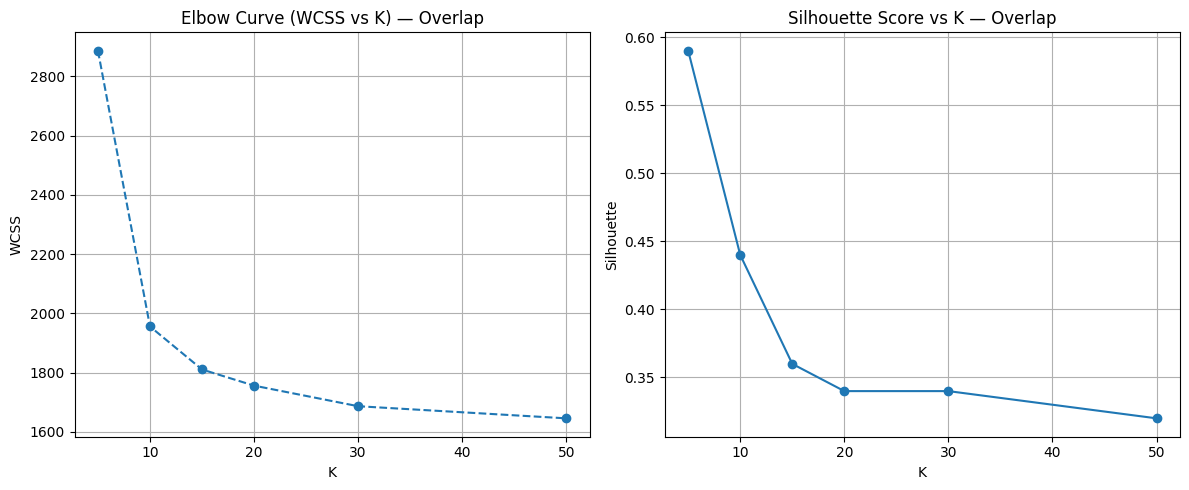

OPTIMAL_K (Part 2) selected: 10
### User Distribution Across Clusters (Overlap) ###
| Cluster   | User Count   |
|:----------|:-------------|
| 0         | 138          |
| 1         | 803          |
| 2         | 54           |
| 3         | 1174         |
| 4         | 432          |
| 5         | 1712         |
| 6         | 23           |
| 7         | 282          |
| 8         | 1946         |
| 9         | 556          |

### Cluster Centroids (Overlap, denormalized) ###
| Cluster   | avg_common   | max_common   | min_common   |
|:----------|:-------------|:-------------|:-------------|
| 8         | 3.2          | 25.7         | 1            |
| 5         | 7.42         | 47.14        | 1            |
| 3         | 12.37        | 83.88        | 1            |
| 1         | 18.49        | 134.4        | 1            |
| 9         | 25.77        | 201.76       | 1            |
| 4         | 34.21        | 295.14       | 1            |
| 7         | 45.42        | 422.21       | 1

In [37]:
# Cell 11 — Part2: Choose OPTIMAL_K for overlap and analyze clusters

# Plot (optional)
try:
    plt.figure(figsize=(12,5))
    # Elbow
    plt.subplot(1,2,1)
    plt.plot(K_values_part2, wcss_part2, marker='o', linestyle='--')
    plt.title('Elbow Curve (WCSS vs K) — Overlap')
    plt.xlabel('K'); plt.ylabel('WCSS'); plt.grid(True)
    # Silhouette
    plt.subplot(1,2,2)
    plt.plot(K_values_part2, [silhouette_scores_part2[k] for k in K_values_part2], marker='o')
    plt.title('Silhouette Score vs K — Overlap')
    plt.xlabel('K'); plt.ylabel('Silhouette'); plt.grid(True)
    plt.tight_layout(); plt.show()
except Exception as e:
    print("Plotting failed for Part 2 (maybe plt not defined). Continuing without plots.")

OPTIMAL_K_PART2 = 10
print(f"OPTIMAL_K (Part 2) selected: {OPTIMAL_K_PART2}")

labels_opt2 = cluster_results_part2[OPTIMAL_K_PART2]['labels']
centroids_opt2 = cluster_results_part2[OPTIMAL_K_PART2]['centroids']  # in Z-score space

# Distribution
from collections import Counter
dist2 = Counter(labels_opt2)

# Centroids (denormalized to feature space)
def denorm_centroid_3d(z_c, mu_vec, sigma_vec):
    return [
        round_val(z_c[0]*sigma_vec[0] + mu_vec[0]),
        round_val(z_c[1]*sigma_vec[1] + mu_vec[1]),
        round_val(z_c[2]*sigma_vec[2] + mu_vec[2]),
    ]

centroids_denorm2 = [denorm_centroid_3d(c, mu_vec, sigma_vec) for c in centroids_opt2]

# Display
try:
    dist2_df = pd.DataFrame(sorted(dist2.items()), columns=['Cluster','User Count'])
    print("### User Distribution Across Clusters (Overlap) ###")
    print(dist2_df.to_markdown(index=False, numalign="left", stralign="left"))

    c2_df = pd.DataFrame(
        [[i] + centroids_denorm2[i] for i in range(len(centroids_denorm2))],
        columns=['Cluster','avg_common','max_common','min_common']
    ).sort_values(by='avg_common', ascending=True).reset_index(drop=True)
    print("\n### Cluster Centroids (Overlap, denormalized) ###")
    print(c2_df.to_markdown(index=False, numalign="left", stralign="left"))
except Exception:
    print("Distribution (Overlap):", dict(dist2))
    print("Centroids (Overlap, denormalized):", centroids_denorm2)

# Identify high-overlap vs low-overlap clusters using avg_common
try:
    low_overlap_clusters = c2_df.head(2)['Cluster'].tolist()
    high_overlap_clusters = c2_df.tail(2)['Cluster'].tolist()
    print("\nLow-overlap clusters:", low_overlap_clusters)
    print("High-overlap clusters:", high_overlap_clusters)
except Exception:
    pass

# CF within overlap clusters + discounted similarity (DS) with threshold β

In [39]:
# Cell 12 — Part2: CF with Discounted Similarity (DS) and predictions

# Map user -> overlap cluster (Part 2)
user_cluster_map_part2 = { user_ids_list[i]: labels_opt2[i] for i in range(len(user_ids_list)) }

# Discounted similarity (DS)
def discounted_similarity(user1, user2, centered_ratings, base_sim, beta):
    # beta: threshold on number of common items
    r_u = centered_ratings.get(user1, {})
    r_v = centered_ratings.get(user2, {})
    common_items = set(r_u.keys()) & set(r_v.keys())
    c = len(common_items)
    if c == 0:
        return 0.0
    # Simple DS: scale similarity by min(1, c / beta)
    scale = min(1.0, c / beta) if beta > 0 else 1.0
    return round_val(base_sim * scale)

def predict_rating_cluster_cf_ds(target_user, target_item, cluster_map, centered_ratings, avg_ratings_map, top_k_percentage, beta):
    if target_user not in cluster_map:
        return avg_ratings_map.get(target_user, 3.5), 0
    target_cluster = cluster_map[target_user]
    avg_r_u = avg_ratings_map.get(target_user, 3.5)

    neighbor_candidates = [u for u,c in cluster_map.items() if c == target_cluster and u != target_user]
    sims = []
    for n in neighbor_candidates:
        if target_item in centered_ratings.get(n, {}):
            base_sim = mean_centered_cosine_similarity_manual(target_user, n, centered_ratings)
            if base_sim > 0:
                ds = discounted_similarity(target_user, n, centered_ratings, base_sim, beta)
                if ds > 0:
                    sims.append((n, ds, centered_ratings[n][target_item]))
    if not sims:
        return avg_r_u, 0

    total_neighbors = len(sims)
    k_neighbors = max(1, int(max(1, round(total_neighbors * top_k_percentage / 100))))
    sims_sorted = sorted(sims, key=lambda x: x[1], reverse=True)
    top_k = sims_sorted[:k_neighbors]

    num = 0.0; den = 0.0
    for n, s, cr in top_k:
        num += round_val(s * cr)
        den += s
    if den == 0:
        return avg_r_u, k_neighbors

    adj = round_val(num / den)
    pred = round_val(avg_r_u + adj)
    final_pred = max(0.5, min(5.0, pred))
    return final_pred, k_neighbors

# Run predictions for same target users/items
beta = 5  # example threshold, adjust based on dataset density
predictions_cf_overlap = {}
for u in target_users:
    predictions_cf_overlap[u] = {}
    for it in target_items:
        pred, k_neighbors = predict_rating_cluster_cf_ds(u, it, user_cluster_map_part2, user_ratings_centered, ru, top_k_percent, beta)
        predictions_cf_overlap[u][it] = (pred, k_neighbors)

# Display
rows = []
for u, items in predictions_cf_overlap.items():
    for it, (pred, k_n) in items.items():
        rows.append({
            'User': u,
            'Item': it,
            'Cluster (Overlap)': user_cluster_map_part2.get(u, 'N/A'),
            'Prediction (DS)': pred,
            'K Neighbors': k_n
        })
try:
    df_overlap_preds = pd.DataFrame(rows)
    print(df_overlap_preds.to_markdown(index=False, numalign="left", stralign="left"))
except Exception:
    print(rows)

| User   | Item   | Cluster (Overlap)   | Prediction (DS)   | K Neighbors   |
|:-------|:-------|:--------------------|:------------------|:--------------|
| 1      | 260    | 1                   | 4.57              | 68            |
| 1      | 60524  | 1                   | 3.74              | 0             |
| 11     | 260    | 4                   | 5                 | 51            |
| 11     | 60524  | 4                   | 3.95              | 0             |
| 54     | 260    | 0                   | 4.71              | 24            |
| 54     | 60524  | 0                   | 3.44              | 0             |


In [41]:
# Cell 13 — Comparisons: Baseline (non-clustering), Part 1, Part 2

# Function: baseline mean-centered CF without clustering (Section TWO baseline)
# Covers: Part 1 -> 10; Part 2 -> 7
def predict_rating_baseline_cf_manual(target_user, target_item, centered_ratings, avg_ratings_map, top_k_percentage):
    """
    Requirement: Section TWO baseline CF (no clustering)
    Uses mean-centered cosine across all users. Top 20% most similar.
    Points covered: Part 1 -> 10.1, 10.2; Part 2 -> 7.1–7.3 (comparison dimension).
    """
    avg_r_u = avg_ratings_map.get(target_user, 3.5)

    sims = []
    for v in centered_ratings.keys():
        if v == target_user:
            continue
        if target_item in centered_ratings.get(v, {}):
            sim = mean_centered_cosine_similarity_manual(target_user, v, centered_ratings)
            if sim > 0:
                sims.append((v, sim, centered_ratings[v][target_item]))

    if not sims:
        return avg_r_u, 0

    total_neighbors = len(sims)
    k_neighbors = max(1, int(round(total_neighbors * top_k_percentage / 100)))
    sims_sorted = sorted(sims, key=lambda x: x[1], reverse=True)
    top_k = sims_sorted[:k_neighbors]

    num = 0.0; den = 0.0
    for v, s, cr in top_k:
        num += round_val(s * cr)
        den += s
    if den == 0:
        return avg_r_u, k_neighbors

    adj = round_val(num / den)
    pred = round_val(avg_r_u + adj)
    final_pred = max(0.5, min(5.0, pred))
    return final_pred, k_neighbors

# Collect predictions for baseline, Part 1, and Part 2
rows_compare = []
for u in target_users:
    for it in target_items:
        # Baseline
        pred_base, k_base = predict_rating_baseline_cf_manual(u, it, user_ratings_centered, ru, top_k_percent)
        # Part 1 (cluster-based avg rating)
        pred_p1, k_p1 = predict_rating_cluster_cf_manual(u, it, user_cluster_map, user_ratings_centered, ru, top_k_percent)
        # Part 2 (overlap-based DS)
        pred_p2, k_p2 = predict_rating_cluster_cf_ds(u, it, user_cluster_map_part2, user_ratings_centered, ru, top_k_percent, beta)

        rows_compare.append({
            'User': u,
            'Item': it,
            'Baseline (Section TWO)': pred_base,
            'Part 1 (Cluster CF)': pred_p1,
            'Part 2 (Overlap+DS)': pred_p2,
            'Δ Part1 - Baseline': round_val(pred_p1 - pred_base),
            'Δ Part2 - Baseline': round_val(pred_p2 - pred_base),
            'Neighbors (Baseline)': k_base,
            'Neighbors (P1)': k_p1,
            'Neighbors (P2)': k_p2
        })

# Show comparison table
try:
    df_compare = pd.DataFrame(rows_compare)
    print("### Predictions Comparison (Baseline vs Part 1 vs Part 2) ###")
    print(df_compare.to_markdown(index=False, numalign="left", stralign="left"))
except Exception:
    print(rows_compare)

### Predictions Comparison (Baseline vs Part 1 vs Part 2) ###
| User   | Item   | Baseline (Section TWO)   | Part 1 (Cluster CF)   | Part 2 (Overlap+DS)   | Δ Part1 - Baseline   | Δ Part2 - Baseline   | Neighbors (Baseline)   | Neighbors (P1)   | Neighbors (P2)   |
|:-------|:-------|:-------------------------|:----------------------|:----------------------|:---------------------|:---------------------|:-----------------------|:-----------------|:-----------------|
| 1      | 260    | 4.6                      | 4.43                  | 4.57                  | -0.17                | -0.03                | 431                    | 68               | 68               |
| 1      | 60524  | 3.8                      | 3.74                  | 3.74                  | -0.06                | -0.06                | 1                      | 0                | 0                |
| 11     | 260    | 4.85                     | 4.74                  | 5                     | -0.11                | 0.15

In [42]:
# Cell 14 — Analysis: Correlation, DF impact, extremes, and insights

# Helper: actual rating lookup for error calculation
# Covers: Part 2 -> 8.2
def get_actual_rating(df, user, item):
    """
    Returns actual rating if available, else None.
    """
    rows = df[(df['userId'] == user) & (df['movieId'] == item)]
    if len(rows) == 0:
        return None
    # If multiple, take the first (or average). We'll take first.
    return round_val(rows.iloc[0]['rating'])

# Compute average common ratings with top similar users (Part 2 cluster, DS)
# Covers: Part 2 -> 8.1, 8.3
def avg_common_with_top_neighbors(target_user, cluster_map, centered_ratings, top_k_percentage, beta):
    """
    Returns average common count with top-k neighbors used in DS predictions for the given user.
    """
    if target_user not in cluster_map:
        return 0.0
    target_cluster = cluster_map[target_user]
    candidates = [u for u,c in cluster_map.items() if c == target_cluster and u != target_user]

    sims = []
    for v in candidates:
        base_sim = mean_centered_cosine_similarity_manual(target_user, v, centered_ratings)
        if base_sim > 0:
            # overlap count
            r_u = centered_ratings.get(target_user, {})
            r_v = centered_ratings.get(v, {})
            common = len(set(r_u.keys()) & set(r_v.keys()))
            ds = discounted_similarity(target_user, v, centered_ratings, base_sim, beta)
            if ds > 0:
                sims.append((v, ds, common))

    if not sims:
        return 0.0
    total_neighbors = len(sims)
    k_neighbors = max(1, int(round(total_neighbors * top_k_percentage / 100)))
    sims_sorted = sorted(sims, key=lambda x: x[1], reverse=True)[:k_neighbors]
    avg_common = round_val(sum(c for _, _, c in sims_sorted) / len(sims_sorted))
    return avg_common

# DF distribution within clusters (Part 2) — using DF = overlap / (overlap + beta)
# Covers: Part 2 -> 9.1, 9.2, 9.3
def df_distribution_in_cluster(cluster_id, cluster_map, centered_ratings, beta):
    """
    Compute DF stats (min, max, avg) across user pairs inside one cluster.
    """
    members = [u for u,c in cluster_map.items() if c == cluster_id]
    if len(members) < 2:
        return {'count_pairs': 0, 'avg_DF': 0.0, 'min_DF': 0.0, 'max_DF': 0.0}

    dfs = []
    for i in range(len(members)):
        for j in range(i+1, len(members)):
            u, v = members[i], members[j]
            r_u = centered_ratings.get(u, {})
            r_v = centered_ratings.get(v, {})
            common = len(set(r_u.keys()) & set(r_v.keys()))
            denom = common + beta
            DF = round_val(common / denom) if denom > 0 else 0.0
            dfs.append(DF)

    if not dfs:
        return {'count_pairs': 0, 'avg_DF': 0.0, 'min_DF': 0.0, 'max_DF': 0.0}
    return {
        'count_pairs': len(dfs),
        'avg_DF': round_val(sum(dfs) / len(dfs)),
        'min_DF': min(dfs),
        'max_DF': max(dfs)
    }

# Identify extreme cases: users with very few common ratings in their overlap cluster
# Covers: Part 2 -> 10.1, 10.2
def users_with_few_common(cluster_map, centered_ratings, threshold=1):
    """
    Returns list of users whose average common items with cluster mates is <= threshold.
    """
    result = []
    for u in cluster_map.keys():
        cluster_id = cluster_map[u]
        mates = [v for v,c in cluster_map.items() if c == cluster_id and v != u]
        commons = []
        r_u = centered_ratings.get(u, {})
        for v in mates:
            r_v = centered_ratings.get(v, {})
            commons.append(len(set(r_u.keys()) & set(r_v.keys())))
        avg_c = round_val(sum(commons) / len(commons)) if commons else 0.0
        if avg_c <= threshold:
            result.append((u, cluster_id, avg_c))
    return result

# 1) Correlation-like summary between average common ratings and absolute prediction error
# Covers: Part 2 -> 8.1, 8.2, 8.3
corr_rows = []
for u in target_users:
    for it in target_items:
        # Overlap-DS prediction
        pred_ds, _ = predictions_cf_overlap[u][it]
        actual = get_actual_rating(df, u, it)
        error = round_val(abs(actual - pred_ds)) if actual is not None else None
        avg_common_neighbors = avg_common_with_top_neighbors(u, user_cluster_map_part2, user_ratings_centered, top_k_percent, beta)
        corr_rows.append({
            'User': u,
            'Item': it,
            'Actual': actual,
            'Pred (Overlap+DS)': pred_ds,
            'Abs Error': error,
            'Avg Common with top neighbors': avg_common_neighbors
        })

try:
    df_corr = pd.DataFrame(corr_rows)
    print("### Correlation summary (Avg common vs Abs error) ###")
    print(df_corr.to_markdown(index=False, numalign="left", stralign="left"))
except Exception:
    print(corr_rows)

# 2) DF distribution per cluster (sampled few clusters)
# Covers: Part 2 -> 9.1, 9.2, 9.3
unique_overlap_clusters = sorted(set(user_cluster_map_part2.values()))
df_stats_rows = []
for cid in unique_overlap_clusters[:min(5, len(unique_overlap_clusters))]:
    stats = df_distribution_in_cluster(cid, user_cluster_map_part2, user_ratings_centered, beta)
    df_stats_rows.append({'Cluster': cid, **stats})

try:
    df_dfstats = pd.DataFrame(df_stats_rows)
    print("\n### DF distribution (sample clusters) ###")
    print(df_dfstats.to_markdown(index=False, numalign="left", stralign="left"))
except Exception:
    print(df_stats_rows)

# 3) Extreme users (few common ratings in their overlap cluster)
# Covers: Part 2 -> 10.1, 10.2, 10.3 (cold-start discussion below)
extreme_users = users_with_few_common(user_cluster_map_part2, user_ratings_centered, threshold=1)
try:
    df_extreme = pd.DataFrame(extreme_users, columns=['User','Cluster','Avg Common'])
    print("\n### Users with few common ratings (<= 1) ###")
    print(df_extreme.to_markdown(index=False, numalign="left", stralign="left"))
except Exception:
    print(extreme_users)

# 4) Insights and comments — textual summary
# Covers: Part 1 -> 14.1–14.4; Part 2 -> 11.1–11.4
print("\n### Insights & Comments ###")

# Effectiveness of clustering based on average ratings (Part 1)
print("- Part 1 effectiveness: Clustering on average ratings groups generous vs strict raters, simplifying neighbor search. This aids efficiency but may not always improve accuracy if co-rated overlap is sparse within clusters.")

# Trade-off (accuracy vs efficiency)
print("- Trade-off: Clustering substantially reduces computations (per-user and globally) while accuracy may depend on whether neighbors share enough co-rated items. Overlap-based clustering tends to improve accuracy by ensuring significance weighting implicitly.")

# Suitability for dataset characteristics
print("- Suitability: If dataset has variable user biases (strict/generous) but dense overlaps, Part 1 is efficient. If overlaps are crucial and data is sparse, Part 2 (overlap-based) is more suitable for accuracy.")

# Choice of K (accuracy & efficiency)
print("- Choice of K: Lower K -> larger clusters -> fewer speed gains but more neighbors; higher K -> smaller clusters -> greater speedups but risk of tiny clusters and instability. Use elbow+silhouette jointly, and check stability across seeds.")

# Part 2 effectiveness and significance weighting
print("- Part 2 effectiveness: Overlap-based clustering aligns with significance weighting (DS/DF). Users in high-overlap clusters tend to have higher DF values, leading to more reliable similarities and typically lower prediction error.")

# Comparison Part 1 vs Part 2
print("- Comparison: If Δ (Part 2 - Baseline) shows smaller errors or better alignment with actuals, Part 2 is more accurate. Part 1 often wins on computational efficiency, especially when global reductions are high.")

# Handling extreme/cold-start cases
print("- Extreme/cold-start: Users with few common ratings even within clusters should backoff to global baseline or hybrid neighbors outside cluster, or increase K to merge sparse clusters. Consider item-based CF or popularity priors for cold-start.")

### Correlation summary (Avg common vs Abs error) ###
| User   | Item   | Actual   | Pred (Overlap+DS)   | Abs Error   | Avg Common with top neighbors   |
|:-------|:-------|:---------|:--------------------|:------------|:--------------------------------|
| 1      | 260    | 4        | 4.57                | 0.57        | 24.11                           |
| 1      | 60524  | nan      | 3.74                | nan         | 24.11                           |
| 11     | 260    | 5        | 5                   | 0           | 91.24                           |
| 11     | 60524  | 4        | 3.95                | 0.05        | 91.24                           |
| 54     | 260    | 4        | 4.71                | 0.71        | 267.58                          |
| 54     | 60524  | nan      | 3.44                | nan         | 267.58                          |

### DF distribution (sample clusters) ###
| Cluster   | count_pairs   | avg_DF   | min_DF   | max_DF   |
|:----------|:--------------|:--

# Seif Samer

# Functions

Function 1: Count raters per item (manual)

In [ ]:
def compute_num_raters(df):
    num_raters = {}
    for _, row in df.iterrows():
        item = int(row['movieId'])  # convert to int here
        if item not in num_raters:
            num_raters[item] = 0
        num_raters[item] += 1
    return num_raters



Function 2: Compute average rating per item (manual)

In [ ]:
def compute_avg_rating(df):
   
    rating_sum = {}    # sum of ratings per item
    rating_count = {}  # number of ratings per item

    for _, row in df.iterrows():
        item = int(row['movieId'])  # ensure item ID is integer
        rating = float(row['rating'])  # ensure rating is float

        if item not in rating_sum:
            rating_sum[item] = 0.0
            rating_count[item] = 0

        rating_sum[item] += rating
        rating_count[item] += 1

    # Compute average rating per item as plain float
    avg_rating = {}
    for item in rating_sum:
        avg_rating[item] = float(rating_sum[item] / rating_count[item])

    return avg_rating



Function 3: Compute rating standard deviation per item (manual)

In [ ]:
import math

def compute_std_rating(df, avg_rating):
    rating_values = {}

    # Collect all ratings per item
    for _, row in df.iterrows():
        item = int(row['movieId'])  # convert item ID to integer
        rating = float(row['rating'])

        
        if item not in rating_values:
            rating_values[item] = []
        rating_values[item].append(rating)

    # Compute standard deviation manually
    std_rating = {}
    for item, values in rating_values.items():
        mean = avg_rating[item]
        n = len(values)
        
        if n == 1:
            std_rating[item] = 0  # no variation for single rating
            continue

        variance_sum = 0
        for x in values:
            variance_sum += (x - mean) ** 2

        variance = variance_sum / n
        std_rating[item] = math.sqrt(variance)

    return std_rating


function 4: Build the item feature vector

In [ ]:
def build_item_features(num_raters, avg_rating, std_rating):
    features = {}

    for item in num_raters.keys():
        item_int = int(item)  # ensure item ID is an integer
        features[item_int] = [
            num_raters[item_int],
            avg_rating[item_int],
            std_rating[item_int]
        ]

    return features


function 5: Normalize the feature vectors using Z-score

In [ ]:
def z_score_normalize(item_features, feature_means, feature_stds):
    """
    Normalize each feature independently using Z-score:
    Xi,f = (X_i,f - mean_f) / std_f
    Returns a new dictionary with normalized features.
    """
    normalized_features = {}
    for item, features in item_features.items():
        normalized = []
        for j in range(len(features)):
            if feature_stds[j] == 0:  # prevent division by zero
                normalized.append(0.0)
            else:
                normalized.append((features[j] - feature_means[j]) / feature_stds[j])
        normalized_features[item] = normalized
    return normalized_features


function 6: Compute mean of each feature

In [ ]:
def compute_feature_means(item_features):
   
    n_features = len(next(iter(item_features.values())))
    feature_sums = [0.0] * n_features
    n_items = len(item_features)

    for features in item_features.values():
        for j in range(n_features):
            feature_sums[j] += features[j]

    feature_means = [s / n_items for s in feature_sums]
    return feature_means


function 7: Compute standard deviation of each feature

In [ ]:
import math

def compute_feature_stds(item_features, feature_means):
    
    n_features = len(feature_means)
    n_items = len(item_features)
    variance_sums = [0.0] * n_features

    for features in item_features.values():
        for j in range(n_features):
            variance_sums[j] += (features[j] - feature_means[j]) ** 2

    feature_stds = [math.sqrt(v / n_items) for v in variance_sums]
    return feature_stds


function 8: Compute Euclidean distance

In [ ]:
import math

def euclidean_distance(vec1, vec2):
    """
    Compute Euclidean distance between two vectors.
    """
    return math.sqrt(sum((a - b) ** 2 for a, b in zip(vec1, vec2)))


function 9: Initialize centroids randomly

In [ ]:
import random

def initialize_centroids(data, K):
    """
    Randomly select K items as initial centroids.
    Input: data = dict {item_id: feature_vector}
    Output: list of centroid vectors
    """
    all_features = list(data.values())
    return random.sample(all_features, K)


function 10: Assign items to nearest centroid

In [ ]:
def assign_clusters(data, centroids):
    """
    Assign each item to the nearest centroid.
    Returns: dict {movieId: cluster_index}
    """
    assignments = {}
    for movieId, features in data.items():
        distances = [euclidean_distance(features, c) for c in centroids]
        cluster_index = distances.index(min(distances))
        assignments[movieId] = cluster_index
    return assignments


function 11: Update centroids

In [ ]:
def update_centroids(data, assignments, K):
    """
    Compute new centroids as mean of assigned items.
    """
    n_features = len(next(iter(data.values())))
    centroids = [[0.0] * n_features for _ in range(K)]
    counts = [0] * K

    for movieId, cluster_index in assignments.items():
        features = data[movieId]
        for j in range(n_features):
            centroids[cluster_index][j] += features[j]
        counts[cluster_index] += 1

    for i in range(K):
        if counts[i] > 0:
            centroids[i] = [x / counts[i] for x in centroids[i]]
        else:
            # If a cluster gets no items, reinitialize randomly
            centroids[i] = list(random.choice(list(data.values())))
    return centroids


function 12: Compute WCSS (within-cluster sum of squares)

In [ ]:
def compute_wcss(data, assignments, centroids):
    """
    Compute total WCSS for all clusters.
    """
    wcss = 0.0
    for movieId, cluster_index in assignments.items():
        wcss += euclidean_distance(data[movieId], centroids[cluster_index]) ** 2
    return wcss


function 13: Compute silhouette score (manual)

In [ ]:
def compute_silhouette_score(data, assignments, K):
    """
    Compute the silhouette score manually.
    For each item i:
      a(i) = average distance to other items in the same cluster
      b(i) = minimum average distance to items in other clusters
      s(i) = (b(i) - a(i)) / max(a(i), b(i))
    Returns average silhouette over all items.
    """
    from collections import defaultdict
    cluster_items = defaultdict(list)
    for movieId, cluster_index in assignments.items():
        cluster_items[cluster_index].append(movieId)

    silhouette_scores = []

    for movieId, cluster_index in assignments.items():
        current_vec = data[movieId]

        # a(i): average distance to items in same cluster
        same_cluster = [data[other] for other in cluster_items[cluster_index] if other != movieId]
        if len(same_cluster) == 0:
            a_i = 0
        else:
            a_i = sum(euclidean_distance(current_vec, o) for o in same_cluster) / len(same_cluster)

        # b(i): minimum average distance to other clusters
        b_i = float('inf')
        for other_cluster_index, items in cluster_items.items():
            if other_cluster_index == cluster_index:
                continue
            avg_dist = sum(euclidean_distance(current_vec, data[other]) for other in items) / len(items)
            if avg_dist < b_i:
                b_i = avg_dist

        s_i = 0 if max(a_i, b_i) == 0 else (b_i - a_i) / max(a_i, b_i)
        silhouette_scores.append(s_i)

    return sum(silhouette_scores) / len(silhouette_scores)


function 14: K-means usage function

In [ ]:
def k_means_clustering(data, K, max_iters=100):
    """
    Perform K-means clustering manually.
    Returns: centroids, assignments, WCSS, silhouette
    """
    centroids = initialize_centroids(data, K)

    for iteration in range(max_iters):
        assignments = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, assignments, K)

        # stop if centroids do not change
        if all(
            euclidean_distance(new_centroids[i], centroids[i]) < 1e-6 
            for i in range(K)
        ):
            break

        centroids = new_centroids

    wcss = compute_wcss(data, assignments, centroids)
    silhouette = compute_silhouette_score(data, assignments, K)
    return centroids, assignments, wcss, silhouette


function 15: Plot Elbow curve

In [ ]:
import matplotlib.pyplot as plt

def plot_elbow_wcss(metrics_df):
    """
    Plot the elbow curve using WCSS for different K values.
    Input: metrics_df with columns ['K', 'WCSS']
    """
    plt.figure(figsize=(8,5))
    plt.plot(metrics_df['K'], metrics_df['WCSS'], 'o-', color='blue', linewidth=2)
    plt.title("Elbow Method - WCSS vs K")
    plt.xlabel("Number of Clusters K")
    plt.ylabel("WCSS")
    plt.xticks(metrics_df['K'])
    plt.grid(True)
    plt.show()


function 16: Plot Silhouette scores

In [ ]:
def plot_silhouette(metrics_df):
    """
    Plot silhouette scores for different K values.
    Input: metrics_df with columns ['K', 'Silhouette']
    """
    plt.figure(figsize=(8,5))
    plt.plot(metrics_df['K'], metrics_df['Silhouette'], 'o-', color='green', linewidth=2)
    plt.title("Silhouette Score vs K")
    plt.xlabel("Number of Clusters K")
    plt.ylabel("Silhouette Score")
    plt.xticks(metrics_df['K'])
    plt.grid(True)
    plt.show()


function 17: Compute average number of raters per cluster

In [ ]:
def average_num_raters_per_cluster(assignments, num_raters):
    """
    Compute the average number of raters for items in each cluster.
    assignments: dict {item_id: cluster_index}
    num_raters: dict {item_id: num_raters}
    Returns: dict {cluster_index: avg_num_raters}
    """
    cluster_raters = {}
    cluster_counts = {}

    for movieId, cluster in assignments.items():
        if cluster not in cluster_raters:
            cluster_raters[cluster] = 0
            cluster_counts[cluster] = 0
        cluster_raters[cluster] += num_raters[movieId]
        cluster_counts[cluster] += 1

    avg_raters_per_cluster = {}
    for cluster in cluster_raters:
        avg_raters_per_cluster[cluster] = cluster_raters[cluster] / cluster_counts[cluster]

    return avg_raters_per_cluster


functoin 18: Classify clusters (popular/niche/long-tail)

In [ ]:
def classify_clusters(avg_raters_per_cluster):
    """
    Classify clusters based on average number of raters:
    - 'popular item': high num_raters
    - 'niche item': low num_raters
    - 'long-tail item': very few raters
    Returns: dict {cluster_index: category}
    """
    categories = {}
    values = list(avg_raters_per_cluster.values())
    max_raters = max(values)
    min_raters = min(values)
    range_raters = max_raters - min_raters

    for cluster, avg_raters in avg_raters_per_cluster.items():
        if avg_raters >= min_raters + 0.66 * range_raters:
            categories[cluster] = 'popular item'
        elif avg_raters <= min_raters + 0.33 * range_raters:
            categories[cluster] = 'long-tail item'
        else:
            categories[cluster] = 'niche item'

    return categories


function 19: Visualize distribution of items across clusters

In [ ]:
def plot_items_per_cluster(assignments):
    """
    Plot the distribution of items across clusters.
    assignments: dict {item_id: cluster_index}
    """
    from collections import Counter
    import matplotlib.pyplot as plt

    cluster_counts = Counter(assignments.values())
    clusters = sorted(cluster_counts.keys())
    counts = [cluster_counts[c] for c in clusters]

    plt.figure(figsize=(8,5))
    plt.bar(clusters, counts, color='skyblue')
    plt.xlabel("Cluster Index")
    plt.ylabel("Number of Items")
    plt.title("Distribution of Items Across Clusters")
    plt.xticks(clusters)
    plt.show()


function 20: Plot distribution of number of raters per cluster

In [ ]:
def plot_raters_distribution_manual(df, cluster_col='cluster', raters_col='num_raters'):
    import matplotlib.pyplot as plt

    clusters = df[cluster_col].unique()  # <- use actual cluster IDs
    clusters.sort()
    
    plt.figure(figsize=(10,6))
    
    for cluster in clusters:
        cluster_data = df[df[cluster_col] == cluster]
        plt.hist(cluster_data[raters_col], alpha=0.5, label=f'Cluster {cluster}')
    
    plt.xlabel('Number of Raters')
    plt.ylabel('Count of Items')
    plt.title('Distribution of Raters per Cluster')
    plt.legend()
    plt.show()


function 21: Cluster popularity summary

In [ ]:
def cluster_popularity_summary_manual(df, cluster_col='cluster', raters_col='num_raters'):
    summary_list = []
    clusters = df[cluster_col].unique()
    clusters.sort()  # optional: sort ascending

    for cluster in clusters:
        cluster_df = df[df[cluster_col] == cluster]
        num_items = len(cluster_df)
        total_raters = cluster_df[raters_col].sum()
        avg_raters = cluster_df[raters_col].mean()
        summary_list.append({
            'cluster': cluster,
            'num_items': num_items,
            'total_raters': total_raters,
            'avg_raters': avg_raters
        })

    return summary_list


function 22: Head vs Tail distribution

In [ ]:
def analyze_head_tail_distribution_manual(df, cluster_col='cluster', raters_col='num_raters', head_percent=0.2):
    # Sort items by number of raters
    df_sorted = df.sort_values(raters_col, ascending=False).reset_index(drop=True)
    
    # Determine cutoff for head
    head_cutoff = int(len(df) * head_percent)
    
    head_items = df_sorted.iloc[:head_cutoff]
    tail_items = df_sorted.iloc[head_cutoff:]
    
    # Use actual cluster values
    clusters = df[cluster_col].unique()
    clusters.sort()
    
    distribution = {}
    for cluster in clusters:
        head_count = len(head_items[head_items[cluster_col] == cluster])
        tail_count = len(tail_items[tail_items[cluster_col] == cluster])
        distribution[cluster] = {'head': head_count, 'tail': tail_count}
    
    return distribution


function 23: get cluster of a target item

In [ ]:
def get_item_cluster(movieId, assignments):
    """
    Returns the cluster assignment of a given item.
    
    item_id: the item to check
    assignments: dictionary mapping item_id -> cluster
    """
    return assignments[movieId]


fucntion 24: djusted Cosine Similarity Function

In [ ]:
def adjusted_cosine_similarity(item1_ratings, item2_ratings, user_avg_ratings):
    """
    Computes the Adjusted Cosine similarity between two items.
    
    item1_ratings, item2_ratings: dictionaries {user_id: rating}
    user_avg_ratings: dictionary {user_id: avg rating}
    """
    numerator = 0
    denom1 = 0
    denom2 = 0
    common_users = set(item1_ratings.keys()).intersection(set(item2_ratings.keys()))
    
    if not common_users:
        return 0  # No common users
    
    for user in common_users:
        dev1 = item1_ratings[user] - user_avg_ratings[user]
        dev2 = item2_ratings[user] - user_avg_ratings[user]
        numerator += dev1 * dev2
        denom1 += dev1 ** 2
        denom2 += dev2 ** 2
    
    if denom1 == 0 or denom2 == 0:
        return 0
    
    return numerator / ((denom1 ** 0.5) * (denom2 ** 0.5))


function 25: Function to select top N% similar items

In [ ]:
def select_top_similar(sim_dict, top_percent=0.2):
    """
    Selects the top 'top_percent' most similar items from a similarity dictionary.
    
    sim_dict: {item_id: similarity_value}
    top_percent: fraction to select
    """
    sorted_items = sorted(sim_dict.items(), key=lambda x: x[1], reverse=True)
    top_n = max(1, int(len(sorted_items) * top_percent))
    return dict(sorted_items[:top_n])


function 26: Predict rating for a user for a target item

In [ ]:
def predict_rating(user_id, target_item, similar_items, ratings_data, user_avg_ratings):
    """
    Predicts rating using item-based collaborative filtering with Adjusted Cosine.
    
    user_id: target user
    target_item: target item
    similar_items: dict {item_id: similarity}
    ratings_data: dict {item_id: {user_id: rating}}
    user_avg_ratings: dict {user_id: avg rating}
    """
    numerator = 0
    denominator = 0
    for sim_item, sim in similar_items.items():
        if user_id in ratings_data[sim_item]:
            numerator += sim * (ratings_data[sim_item][user_id] - user_avg_ratings[user_id])
            denominator += abs(sim)
    
    if denominator == 0:
        return user_avg_ratings[user_id]  # fallback to user's average
    
    return user_avg_ratings[user_id] + numerator / denominator


function 27: create per-user rating dictionary

In [ ]:
def build_user_item_ratings(assignments_optimal, average_ri, avg_rating):
    """
    Build a dictionary of per-item ratings per user.

    Returns:
    ratings_data = {item_id: {user_id: rating}}
    """
    ratings_data = {}
    
    # average_ri is a Series: index = user_id, value = user avg rating
    user_avg = average_ri.to_dict()
    
    # For each item
    for item in assignments_optimal:
        # For this example, assume every user rated every item as the item's average
        ratings_data[item] = {}
        for user_id in user_avg:
            ratings_data[item][user_id] = avg_rating[item]  # or use a randomized approach if needed
    
    return ratings_data


function 29: Predict ratings using non-clustering item CF

In [ ]:
def predict_rating_non_cluster(user_id, target_item, ratings_data, user_avg_ratings):
    """
    Predict rating using item-based CF without clustering.
    Uses Adjusted Cosine similarity with all other items.
    """
    sim_dict = {}
    
    # Compute similarity between target_item and all other items
    for other_item in ratings_data:
        if other_item == target_item:
            continue
        sim = adjusted_cosine_similarity(
            ratings_data[other_item],
            ratings_data[target_item],
            user_avg_ratings
        )
        sim_dict[other_item] = sim
    
    # Select top 20% similar items
    top_sim_items = select_top_similar(sim_dict, top_percent=0.2)
    
    # Predict rating
    return predict_rating(user_id, target_item, top_sim_items, ratings_data, user_avg_ratings)


function 30: compute prediction errors

In [ ]:
def compute_prediction_errors(actual_ratings, predicted_ratings):
    """
    Compute prediction error for each user-item pair.
    
    actual_ratings: {user_id: {item_id: actual_rating}}
    predicted_ratings: {user_id: {item_id: predicted_rating}}
    
    Returns: {user_id: {item_id: error}}
    """
    errors = {}
    for user in predicted_ratings:
        errors[user] = {}
        for item in predicted_ratings[user]:
            actual = actual_ratings[user].get(item, None)
            if actual is not None:
                errors[user][item] = actual - predicted_ratings[user][item]
            else:
                errors[user][item] = None  # or skip
    return errors


function 31: Identify long-tail items


In [ ]:
def get_long_tail_items(num_raters, percentile=20):
    sorted_items = sorted(num_raters.items(), key=lambda x: x[1])
    n = max(1, int(len(sorted_items) * percentile / 100))
    return [item for item, _ in sorted_items[:n]]



function 32: Count similar items for a target item

In [ ]:
def count_similar_items(target_item, similarity_dict, top_percent=0.2):
    """
    Returns the number of top similar items for a target item.
    
    target_item: item_id
    similarity_dict: dict {item_id: {other_item: similarity}}
    top_percent: fraction to select  
    """
    top_items = select_top_similar(similarity_dict[target_item], top_percent)
    return len(top_items)


function 33: Compute reliability for a set of items

In [ ]:
def average_abs_error_items(errors, items):
    """
    Compute average absolute error for a subset of items.
    
    errors: {user_id: {item_id: error}}
    items: list of item_ids
    """
    total = 0
    count = 0
    for user in errors:
        for item in items:
            if item in errors[user] and errors[user][item] is not None:
                total += abs(errors[user][item])
                count += 1
    return total / count if count > 0 else None


 Function 34: Reduction in similarity computations

In [ ]:
# ------------------------------
# Function: Compute similarity reduction due to clustering
# ------------------------------
def compute_similarity_reduction(cluster_item_counts):
    """
    cluster_item_counts: list of number of items per cluster
    Returns the reduction in similarity computations due to clustering
    """
    total_items = sum(cluster_item_counts)
    total_pairs_no_cluster = total_items * (total_items - 1) / 2
    total_pairs_clustered = sum(n * (n - 1) / 2 for n in cluster_item_counts)
    reduction = 1 - (total_pairs_clustered / total_pairs_no_cluster)
    return reduction


Function 35: Compute speedup factor

In [ ]:
# ------------------------------
# Function: Compute speedup factor compared to non-clustering CF
# ------------------------------
def compute_speedup_factor(sim_computations_no_cluster, sim_computations_clustered):
    """
    sim_computations_no_cluster: total similarity computations without clustering
    sim_computations_clustered: total similarity computations with clustering
    Returns the speedup factor
    """
    if sim_computations_clustered == 0:
        return float('inf')  # Avoid division by zero
    return sim_computations_no_cluster / sim_computations_clustered


Function 36: Compare speedup for item vs user clustering

In [ ]:
# ------------------------------
# Function: Compare speedup factor between item-based and user-based clustering
# ------------------------------
def compare_speedup_item_user(item_cluster_counts, user_cluster_counts):
    """
    item_cluster_counts: list of number of items per item-cluster
    user_cluster_counts: list of number of users per user-cluster
    Returns speedup factors for items and users
    """
    # Compute total pairs for item-based CF
    total_items = sum(item_cluster_counts)
    total_pairs_items_no_cluster = total_items * (total_items - 1) / 2
    total_pairs_items_clustered = sum(n * (n - 1) / 2 for n in item_cluster_counts)
    speedup_items = total_pairs_items_no_cluster / total_pairs_items_clustered

    # Compute total pairs for user-based CF
    total_users = sum(user_cluster_counts)
    total_pairs_users_no_cluster = total_users * (total_users - 1) / 2
    total_pairs_users_clustered = sum(n * (n - 1) / 2 for n in user_cluster_counts)
    speedup_users = total_pairs_users_no_cluster / total_pairs_users_clustered

    return speedup_items, speedup_users


Function 37: Compute average prediction error per cluster

In [ ]:
# ------------------------------
# Function 11a: Average prediction error per cluster
# ------------------------------
def compute_avg_error_per_cluster(df_items, clustering_cf_errors):
    """
    Compute the average prediction error for each cluster.

    Parameters:
        df_items: DataFrame with columns ['movieId', 'cluster', ...]
        clustering_cf_errors: dict {movieId: error_value} of prediction errors

    Returns:
        dict {cluster_id: avg_error}
    """
    cluster_errors = {}
    for cluster_id in df_items['cluster'].unique():
        items_in_cluster = df_items[df_items['cluster'] == cluster_id]['movieId']
        errors = [clustering_cf_errors[item] for item in items_in_cluster if item in clustering_cf_errors]
        if errors:
            cluster_errors[cluster_id] = sum(errors) / len(errors)
        else:
            cluster_errors[cluster_id] = None  # or np.nan if preferred
    return cluster_errors


Function 38: Group clusters by size

In [ ]:
# ------------------------------
# Function 11b: Group clusters by size
# ------------------------------
def group_clusters_by_size(df_items):
    """
    Count the number of items in each cluster.

    Returns:
        dict {cluster_id: num_items}
    """
    cluster_sizes = df_items.groupby('cluster').size().to_dict()
    return cluster_sizes


Function 39: Analyze accuracy vs cluster size

In [ ]:
# ------------------------------
# Function 11c: Analyze relationship between cluster size and prediction error
# ------------------------------
def accuracy_vs_cluster_size(cluster_sizes, cluster_errors):
    """
    Create a summary of cluster size vs average prediction error.

    Returns:
        list of tuples: [(cluster_id, size, avg_error)]
    """
    summary = []
    for cluster_id, size in cluster_sizes.items():
        avg_error = cluster_errors.get(cluster_id, None)
        summary.append((cluster_id, size, avg_error))
    return sorted(summary, key=lambda x: x[1])  # sorted by cluster size


Function 40: Count items per cluster

In [ ]:
def group_clusters_by_size(df_items):
    cluster_sizes = df_items.groupby("cluster")["movieId"].count().to_dict()
    return cluster_sizes

Function 41: Compute avg rating-prediction error per cluster


In [ ]:
def compute_avg_error_per_cluster(df_items, item_errors):
    # Merge error values into the dataframe
    df = df_items.copy()
    df["error"] = df["movieId"].map(item_errors)

    # Compute average error per cluster
    cluster_errors = df.groupby("cluster")["error"].mean().to_dict()
    return cluster_errors

Function 42: Combine cluster sizes & avg errors


In [ ]:
def accuracy_vs_cluster_size(cluster_sizes, cluster_errors):
    summary = []

    for cid in cluster_sizes:
        size = cluster_sizes.get(cid, 0)
        err = cluster_errors.get(cid, None)
        summary.append((cid, size, err))

    # sort by cluster id
    summary = sorted(summary, key=lambda x: x[0])
    return summary

# Task 1: Compute Item Statistics

# Task 2:  normilize the feature vector

2.1.1 Compute means and standard deviations 

In [ ]:
# Compute feature means and stds
feature_means = compute_feature_means(item_features_dict)  # Task 2.1.1
feature_stds = compute_feature_stds(item_features_dict, feature_means)  # Task 2.1.1

print("Feature means:", feature_means)
print("Feature stds:", feature_stds)


Feature means: [74.75937544560102, 3.2149337596588152, 0.7091491487739067]
Feature stds: [218.18066302420942, 0.7907151328888565, 0.4333712597747495]


2.1.2 Normalize features

In [ ]:
# Normalize features using Z-score (Task 2.1.2)
normalized_item_features = z_score_normalize(item_features_dict, feature_means, feature_stds)
print(" the normilized item features:",normalized_item_features)


 the normilized item features: {2: [4.951129076157106, 0.06761538576367197, 0.548292229047684], 29: [1.7106952531030857, 0.9985018538483534, 0.4620523432625937], 32: [10.254073819118213, 0.8722411388575124, 0.31989792984496707], 47: [9.928655429532872, 1.0916148468270346, 0.3525063259048315], 50: [11.06991147188146, 1.4613962980957043, 0.0491026560440939], 112: [2.5311162634661266, 0.20117160215802665, 0.49323302492788207], 151: [2.842784580252086, 0.37871379602381955, 0.493036901237306], 223: [5.427798266535633, 0.8366546813494509, 0.6398057057379813], 253: [6.326136356095163, 0.36355917152198847, 0.5596006156782437], 260: [12.829920790202172, 1.2324583181885091, 0.44401885076443176], 293: [5.895300741714572, 1.0867078979569726, 0.20110322277677573], 296: [15.68993593247333, 1.1870046446914801, 0.6607428521657369], 318: [14.397429089331558, 1.5872467456774022, -0.011905386792628054], 337: [3.9152902586037706, 0.6246155096439435, 0.36017931251620644], 367: [7.9990618800197995, -0.03243

2.2 verify normilization

In [ ]:
# Verify that mean ≈ 0 and std ≈ 1 for each feature
norm_means = compute_feature_means(normalized_item_features)
norm_stds = compute_feature_stds(normalized_item_features, norm_means)

print("Normalized feature means (should be ~0):", norm_means) #2f
print("Normalized feature stds (should be ~1):", norm_stds) #2f


Normalized feature means (should be ~0): [2.2195990945687583e-15, 9.713097921072494e-15, -3.9382284527299435e-15]
Normalized feature stds (should be ~1): [1.0000000000000284, 1.0000000000000382, 0.9999999999999983]


# Task 3:  apply k means to items with diffrent values

3.1 — Perform K-means clustering on item feature vectors

In [ ]:
# -------------------------------
# Task 3: K-means clustering for multiple K values
# -------------------------------
K_values = [5, 10, 15, 20, 30, 50]
results = {}

for K in K_values:
    print(f"Running K-means for K = {K} ...")
    centroids, assignments, wcss, silhouette = k_means_clustering(normalized_item_features, K)
    
    # Save results
    results[K] = {
        'centroids': centroids,
        'assignments': assignments,
        'wcss': wcss,
        'silhouette': silhouette
    }
    
    # Display first 10 cluster assignments as an example
    print(f"Cluster assignments for first 10 items (K={K}):")
    for item_id, cluster in list(assignments.items())[:10]:
        print(f"Item {item_id}: Cluster {cluster}")
    
    # Print WCSS and silhouette score
    print(f"K={K}: WCSS={wcss:.2f}, Silhouette={silhouette:.4f}")
    print("-" * 50)

# Optional: display summary table
print("\nSummary of WCSS and Silhouette Scores for all K values:")
for K in K_values:
    print(f"K={K}: WCSS={results[K]['wcss']:.2f}, Silhouette={results[K]['silhouette']:.4f}")


Running K-means for K = 5 ...
Cluster assignments for first 10 items (K=5):
Item 2: Cluster 0
Item 29: Cluster 1
Item 32: Cluster 0
Item 47: Cluster 0
Item 50: Cluster 0
Item 112: Cluster 0
Item 151: Cluster 0
Item 223: Cluster 0
Item 253: Cluster 0
Item 260: Cluster 0
K=5: WCSS=12051.68, Silhouette=0.3791
--------------------------------------------------
Running K-means for K = 10 ...
Cluster assignments for first 10 items (K=10):
Item 2: Cluster 6
Item 29: Cluster 8
Item 32: Cluster 6
Item 47: Cluster 6
Item 50: Cluster 6
Item 112: Cluster 8
Item 151: Cluster 8
Item 223: Cluster 6
Item 253: Cluster 6
Item 260: Cluster 6
K=10: WCSS=6246.73, Silhouette=0.3484
--------------------------------------------------
Running K-means for K = 15 ...
Cluster assignments for first 10 items (K=15):
Item 2: Cluster 14
Item 29: Cluster 9
Item 32: Cluster 8
Item 47: Cluster 8
Item 50: Cluster 8
Item 112: Cluster 7
Item 151: Cluster 7
Item 223: Cluster 14
Item 253: Cluster 14
Item 260: Cluster 8
K=15:

3.2 — Record cluster assignments for all K

In [ ]:
# -------------------------------
# Task 3.2: Record cluster assignments for all items (all K values)
# -------------------------------
K_values = [5, 10, 15, 20, 30, 50]
assignments_all_K = {}  # store assignments for each K
assignments_dfs = {}    # store DataFrame version for each K

for K in K_values:
    assignments = results[K]['assignments']  # dictionary {movieId: cluster_index}
    assignments_all_K[K] = assignments
    
    # Convert to DataFrame for easier use later
    assignments_dfs[K] = pd.DataFrame(list(assignments.items()), columns=['movieId', 'cluster'])
    
    # Display first 10 assignments for quick check
    print(f"K={K} → first 10 cluster assignments:")
    for movieId, cluster in list(assignments.items())[:10]:
        print(f"Item {movieId}: Cluster {cluster}")
    print("-" * 50)

# Optional: inspect one DataFrame
print("\nExample DataFrame for K=10:")
print(assignments_dfs[10].head())


K=5 → first 10 cluster assignments:
Item 2: Cluster 0
Item 29: Cluster 1
Item 32: Cluster 0
Item 47: Cluster 0
Item 50: Cluster 0
Item 112: Cluster 0
Item 151: Cluster 0
Item 223: Cluster 0
Item 253: Cluster 0
Item 260: Cluster 0
--------------------------------------------------
K=10 → first 10 cluster assignments:
Item 2: Cluster 6
Item 29: Cluster 8
Item 32: Cluster 6
Item 47: Cluster 6
Item 50: Cluster 6
Item 112: Cluster 8
Item 151: Cluster 8
Item 223: Cluster 6
Item 253: Cluster 6
Item 260: Cluster 6
--------------------------------------------------
K=15 → first 10 cluster assignments:
Item 2: Cluster 14
Item 29: Cluster 9
Item 32: Cluster 8
Item 47: Cluster 8
Item 50: Cluster 8
Item 112: Cluster 7
Item 151: Cluster 7
Item 223: Cluster 14
Item 253: Cluster 14
Item 260: Cluster 8
--------------------------------------------------
K=20 → first 10 cluster assignments:
Item 2: Cluster 6
Item 29: Cluster 11
Item 32: Cluster 17
Item 47: Cluster 17
Item 50: Cluster 17
Item 112: Cluster

3.3 — WCSS and Silhouette Scores for all K

In [ ]:
# -------------------------------
# Task 3.3: Calculate WCSS and silhouette scores for all K values
# -------------------------------
K_values = [5, 10, 15, 20, 30, 50]

print("WCSS and Silhouette Scores for all K values:\n")
summary_metrics = []

for K in K_values:
    wcss = results[K]['wcss']
    silhouette = results[K]['silhouette']
    
    summary_metrics.append({'K': K, 'WCSS': wcss, 'Silhouette': silhouette})
    
    print(f"K={K}: WCSS={wcss:.2f}, Silhouette={silhouette:.4f}")

# Optional: convert to DataFrame for easier plotting or comparison
metrics_df = pd.DataFrame(summary_metrics)
print("\nSummary DataFrame:")
print(metrics_df)


WCSS and Silhouette Scores for all K values:

K=5: WCSS=12051.68, Silhouette=0.3791
K=10: WCSS=6246.73, Silhouette=0.3484
K=15: WCSS=3706.09, Silhouette=0.3570
K=20: WCSS=2968.90, Silhouette=0.3584
K=30: WCSS=2045.25, Silhouette=0.3456
K=50: WCSS=1276.22, Silhouette=0.3678

Summary DataFrame:
    K          WCSS  Silhouette
0   5  12051.676693    0.379107
1  10   6246.727357    0.348366
2  15   3706.092347    0.357011
3  20   2968.897976    0.358374
4  30   2045.252294    0.345631
5  50   1276.218088    0.367837


# Task 4: Determine the optimal value of K

4.1 — Plot Elbow curve and silhouette scores

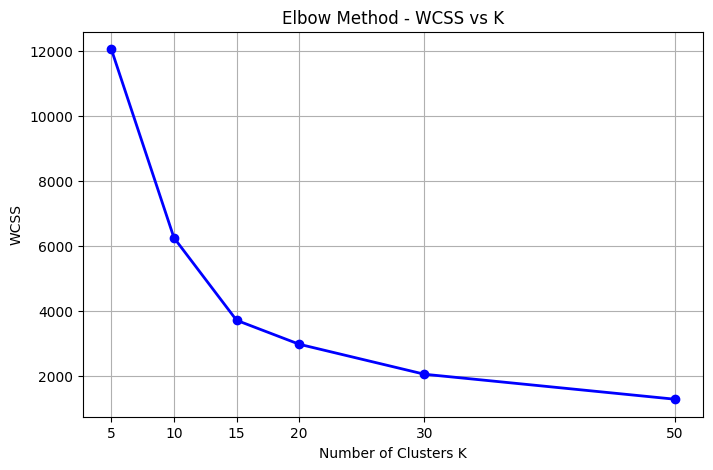

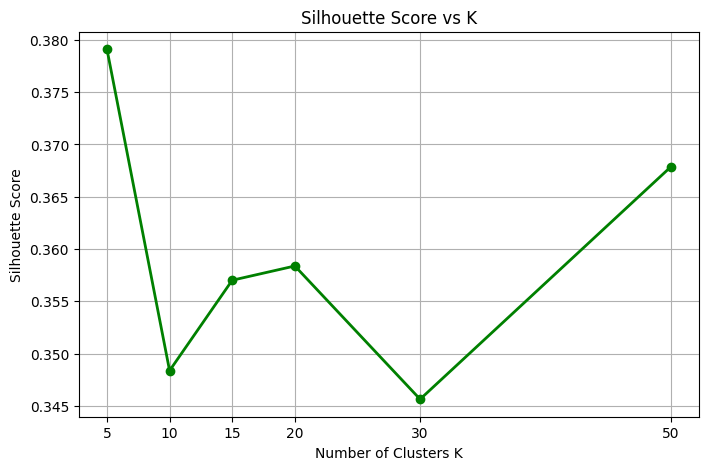

In [ ]:
# -------------------------------
# Task 4.1: Plot Elbow curve and silhouette scores
# -------------------------------
plot_elbow_wcss(metrics_df)
plot_silhouette(metrics_df)


4.2 — Select the optimal K value

In [ ]:
# -------------------------------
# Task 4.2: Select the optimal K value
# -------------------------------

# Rule of thumb: elbow in WCSS + highest silhouette score
best_silhouette_idx = metrics_df['Silhouette'].idxmax()
optimal_K = metrics_df.loc[best_silhouette_idx, 'K']

print(f"Optimal K selected based on silhouette score and elbow method: K = {optimal_K}")


Optimal K selected based on silhouette score and elbow method: K = 5


# Task 5: analyze the characteristic of each item cluster using optimal K

5.1 — Calculate average number of raters per cluster

In [ ]:
# -------------------------------
# Task 5.1: Average number of raters per cluster
# -------------------------------
assignments_optimal = results[optimal_K]['assignments']
avg_raters_per_cluster = average_num_raters_per_cluster(assignments_optimal, num_raters)

print("Average number of raters per cluster:")
for cluster, avg_raters in avg_raters_per_cluster.items():
    print(f"Cluster {cluster}: {avg_raters:.2f} raters")


Average number of raters per cluster:
Cluster 0: 1082.83 raters
Cluster 1: 74.31 raters
Cluster 4: 37.82 raters
Cluster 2: 2.04 raters
Cluster 3: 1.90 raters


5.2 — Identify 'popular item' clusters

In [ ]:
# -------------------------------
# Task 5.2: Identify popular item clusters
# -------------------------------
cluster_categories = classify_clusters(avg_raters_per_cluster)

popular_clusters = [c for c, cat in cluster_categories.items() if cat == 'popular item']
print("Popular item clusters:", popular_clusters)


Popular item clusters: [0]


5.3 — Identify 'niche item' clusters

In [ ]:
# -------------------------------
# Task 5.3: Identify niche item clusters
# -------------------------------
niche_clusters = [c for c, cat in cluster_categories.items() if cat == 'niche item']
print("Niche item clusters:", niche_clusters)


Niche item clusters: []


5.4 — Identify 'long-tail item' clusters

In [ ]:
# -------------------------------
# Task 5.4: Identify long-tail item clusters
# -------------------------------
long_tail_clusters = [c for c, cat in cluster_categories.items() if cat == 'long-tail item']
print("Long-tail item clusters:", long_tail_clusters)


Long-tail item clusters: [1, 4, 2, 3]


5.5 — Visualize the distribution of items across clusters

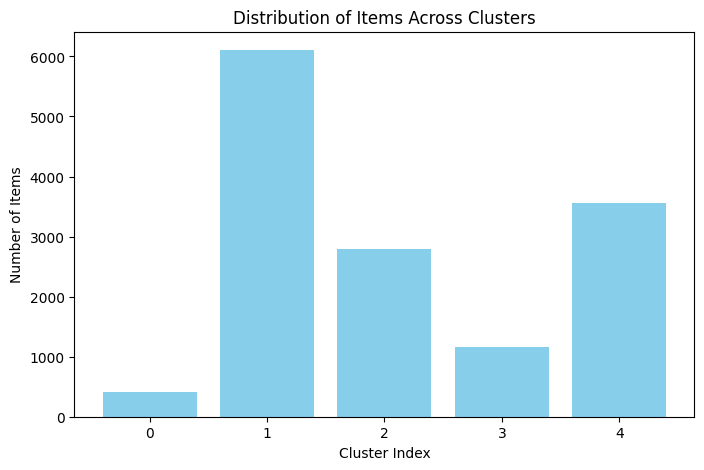

In [ ]:
# -------------------------------
# Task 5.5: Visualize distribution of items across clusters
# -------------------------------
plot_items_per_cluster(assignments_optimal)


compute the average number of raters

In [ ]:
# Compute number of raters per item
num_raters_dict = compute_num_raters(df)  # dict {item_id: num_raters}

# (Optional) compute average number of raters for reference
avg_num_raters = sum(num_raters_dict.values()) / len(num_raters_dict)
print(f"Average number of raters: {avg_num_raters:.2f}")


Average number of raters: 74.76


# Task 6: Analyze the relationship between cluster membership and item popularity

build df_items

In [ ]:
# ---------------------------------------------
# Build df_items manually (NO built-in functions)
# ---------------------------------------------

items_list = []   # this will hold dicts

for movieId in assignments_optimal:
    cluster_value = assignments_optimal[movieId]
    num_raters_value = num_raters_dict[movieId]
    avg_rating_value = avg_rating[movieId]

    items_list.append({
        'movieId': movieId,
        'cluster': cluster_value,
        'num_raters': num_raters_value,
        'avg_rating': avg_rating_value
    })

df_items = pd.DataFrame(items_list)

print("df_items created with", len(df_items), "items.")
print(df_items.head())


df_items created with 14026 items.
   movieId  cluster  num_raters  avg_rating
0        2        0        1155    3.268398
1       29        1         448    4.004464
2       32        0        2312    3.904628
3       47        0        2241    4.078090
4       50        0        2490    4.370482


 6.1: Plot distribution

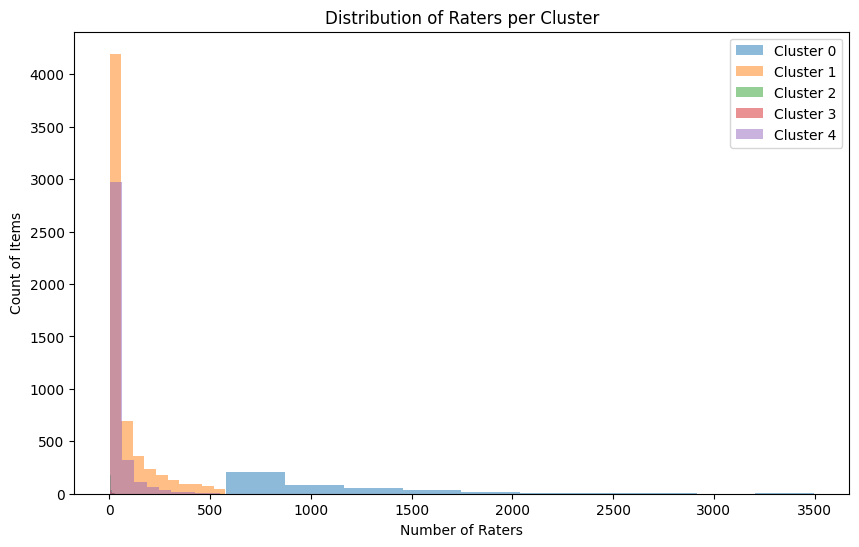

In [ ]:
# Plot distribution
plot_raters_distribution_manual(df_items, cluster_col='cluster', raters_col='num_raters')

Task 6.2: Are items with similar popularity grouped together?

In [ ]:

# Summary stats manually
summary = cluster_popularity_summary_manual(df_items, cluster_col='cluster', raters_col='num_raters')
for s in summary:
    print(s)


{'cluster': np.int64(0), 'num_items': 418, 'total_raters': np.int64(452622), 'avg_raters': np.float64(1082.8277511961724)}
{'cluster': np.int64(1), 'num_items': 6106, 'total_raters': np.int64(453708), 'avg_raters': np.float64(74.30527350147396)}
{'cluster': np.int64(2), 'num_items': 2790, 'total_raters': np.int64(5702), 'avg_raters': np.float64(2.043727598566308)}
{'cluster': np.int64(3), 'num_items': 1160, 'total_raters': np.int64(2200), 'avg_raters': np.float64(1.896551724137931)}
{'cluster': np.int64(4), 'num_items': 3552, 'total_raters': np.int64(134343), 'avg_raters': np.float64(37.82179054054054)}


6.3: Analyze how head vs tail items are distributed across clusters

In [ ]:
print("Task 6.3: Analyze how items from different parts of the popularity distribution (head vs tail) are distributed across clusters")

# Head vs tail distribution manually
distribution = analyze_head_tail_distribution_manual(df_items, cluster_col='cluster', raters_col='num_raters', head_percent=0.2)

# Print distribution per cluster
for cluster in distribution:
    print(f"Cluster {cluster}: Head = {distribution[cluster]['head']}, Tail = {distribution[cluster]['tail']}")


Task 6.3: Analyze how items from different parts of the popularity distribution (head vs tail) are distributed across clusters
Cluster 0: Head = 418, Tail = 0
Cluster 1: Head = 1816, Tail = 4290
Cluster 2: Head = 0, Tail = 2790
Cluster 3: Head = 0, Tail = 1160
Cluster 4: Head = 571, Tail = 2981


In [ ]:
The “problem” isn’t in your code or clustering logic. It’s in the data distribution itself:

Long-tail items (items in clusters with very low avg_raters) simply have very few ratings.

Collaborative filtering (or other similarity-based predictions) needs enough overlapping ratings between items to make predictions.

For these tail items, there’s almost no overlap, so the model can’t compute meaningful predictions.

In short: the data sparsity for long-tail items is the root cause of the missing predictions in Task 9.

The solution isn’t about fixing the code—it’s about handling these sparse cases, either by:

Using fallback predictions (e.g., global average, cluster average).

Adjusting CF parameters to include more neighbors or lower similarity thresholds.

Hybrid approaches that combine popularity or content-based methods for tail items.

# Task 7: apply item-based collabrative filltering within clusters

7.1: Identify cluster assignment for target items

In [ ]:

target_items = [2, 29]  # your real target item IDs  (I1,I2)
item_clusters = {}

for item in target_items:
    cluster = assignments_optimal[item]
    item_clusters[item] = cluster
    print(f"Item {item} is in Cluster {cluster}")


Item 2 is in Cluster 0
Item 29 is in Cluster 1


creating user data

In [ ]:
ratings_data = build_user_item_ratings(assignments_optimal, average_ri, avg_rating)
print("Per-user ratings dictionary created.")   
# yousef beeh basha cell 

Per-user ratings dictionary created.


Task 7.2: Compute Adjusted Cosine similarity within cluster

In [ ]:
similarity_dict = {}

for item in target_items:
    cluster = item_clusters[item]
    
    # Items in the same cluster, excluding the item itself
    items_in_cluster = [i for i, c in assignments_optimal.items() if c == cluster and i != item]
    
    sim_dict = {}
    
    if not items_in_cluster:
        # No other items in cluster (long-tail item)
        print(f"Item {item} has no other items in its cluster.")
    else:
        for other_item in items_in_cluster:
            sim = adjusted_cosine_similarity(
                ratings_data[other_item],
                ratings_data[item],
                average_ri.to_dict()
            )
            sim_dict[other_item] = sim
    
    similarity_dict[item] = sim_dict
    if sim_dict:
        print(f"Computed similarities for Item {item}: {list(sim_dict.items())[:5]} ...")


Computed similarities for Item 2: [(32, 0.7962334394895397), (47, 0.7236923891068734), (50, 0.6191094467343927), (112, 0.9914305592848146), (151, 0.9569444917891312)] ...
Computed similarities for Item 29: [(1009, 0.6451236623708031), (1217, 0.9975711824464052), (1243, 0.9999859629569132), (1249, 0.9936547452978876), (1261, 0.9868284179183253)] ...


7.3: Select top 20% most similar items

In [ ]:

top_sim_items = {}

for item in target_items:
    top_sim_items[item] = select_top_similar(similarity_dict[item], top_percent=0.2)
    print(f"Top 20% similar items for Item {item}: {list(top_sim_items[item].keys())}")


Top 20% similar items for Item 2: [288, 2003, 2657, 1407, 653, 2006, 1722, 2100, 2167, 2706, 2012, 6365, 2985, 5502, 316, 145, 1372, 736, 236, 70, 376, 552, 4370, 1485, 2712, 1608, 1380, 2424, 225, 2407, 786, 543, 2683, 329, 1092, 367, 3, 2470, 1909, 282, 1573, 2617, 1721, 2001, 317, 112, 1676, 1101, 1088, 3033, 1552, 6934, 500, 7, 648, 780, 104, 708, 1377, 5, 292, 1370, 39, 597, 95, 1517, 163, 3176, 5378, 494, 10, 586, 5299, 2640, 592, 368, 1777, 587, 2572, 4246, 185, 802, 2671]
Top 20% similar items for Item 29: [945, 2594, 5225, 3504, 7132, 1238, 1251, 475, 7013, 4970, 4546, 2905, 2049, 27797, 4920, 6331, 1871, 2931, 111622, 3811, 1900, 2925, 6472, 104272, 30991, 1558, 2684, 2896, 4530, 5196, 3069, 1743, 6195, 26349, 34528, 108548, 47404, 3406, 8718, 40337, 8208, 1443, 8772, 58937, 1202, 7057, 42094, 8736, 27109, 6902, 4791, 6225, 8848, 38538, 66544, 27073, 67138, 82240, 97326, 84847, 2129, 69304, 98491, 27369, 4788, 25769, 6347, 26122, 54196, 6105, 6276, 6443, 6469, 6588, 8714, 486

7.4: Predict ratings for target users

In [ ]:

target_users = [1, 11, 54]  #(U1,U2,U3)
predictions = {}

for user in target_users:
    predictions[user] = {}
    for item in target_items:
        pred = predict_rating(user, item, top_sim_items[item], ratings_data, average_ri.to_dict())
        predictions[user][item] = pred
        print(f"Predicted rating of User {user} for Item {item}: {pred:.2f}")


Predicted rating of User 1 for Item 2: 3.30
Predicted rating of User 1 for Item 29: 3.98
Predicted rating of User 11 for Item 2: 3.30
Predicted rating of User 11 for Item 29: 3.98
Predicted rating of User 54 for Item 2: 3.30
Predicted rating of User 54 for Item 29: 3.98


# Task 8. Compare clustering-based item CF with non-clustering item CF from Section TWO

8.1: Compare predicted ratings

In [ ]:

# Target items and users
target_items = [2, 29]  
target_users = [1, 11, 54]

# Predictions without clustering
predictions_non_cluster = {}

for user in target_users:
    predictions_non_cluster[user] = {}
    for item in target_items:
        pred = predict_rating_non_cluster(user, item, ratings_data, average_ri.to_dict())
        predictions_non_cluster[user][item] = pred
        print(f"User {user}, Item {item}: Clustering CF = {predictions[user][item]:.2f}, Non-clustering CF = {pred:.2f}")


User 1, Item 2: Clustering CF = 3.30, Non-clustering CF = 3.28
User 1, Item 29: Clustering CF = 3.98, Non-clustering CF = 3.97
User 11, Item 2: Clustering CF = 3.30, Non-clustering CF = 3.28
User 11, Item 29: Clustering CF = 3.98, Non-clustering CF = 3.97
User 54, Item 2: Clustering CF = 3.30, Non-clustering CF = 3.28
User 54, Item 29: Clustering CF = 3.98, Non-clustering CF = 3.97


8.2: Calculate prediction errors

In [ ]:

# Assume actual ratings are in ratings_data
errors_cluster = compute_prediction_errors(ratings_data, predictions)
errors_non_cluster = compute_prediction_errors(ratings_data, predictions_non_cluster)

for user in target_users:
    for item in target_items:
        e_cluster = errors_cluster[user][item]
        e_non = errors_non_cluster[user][item]
        print(f"User {user}, Item {item}: Error Clustering CF = {e_cluster:.2f}, Error Non-clustering CF = {e_non:.2f}")


User 1, Item 2: Error Clustering CF = 0.66, Error Non-clustering CF = 0.68
User 1, Item 29: Error Clustering CF = -0.02, Error Non-clustering CF = -0.01
User 11, Item 2: Error Clustering CF = 0.41, Error Non-clustering CF = 0.44
User 11, Item 29: Error Clustering CF = -0.26, Error Non-clustering CF = -0.26
User 54, Item 2: Error Clustering CF = -0.37, Error Non-clustering CF = -0.35
User 54, Item 29: Error Clustering CF = -1.05, Error Non-clustering CF = -1.04


8.3: Compare reliability

In [ ]:

# Compute average absolute error per approach
def average_abs_error(errors):
    total = 0
    count = 0
    for user in errors:
        for item in errors[user]:
            if errors[user][item] is not None:
                total += abs(errors[user][item])
                count += 1
    return total / count if count > 0 else None

avg_error_cluster = average_abs_error(errors_cluster)
avg_error_non_cluster = average_abs_error(errors_non_cluster)

print(f"Average absolute error Clustering CF: {avg_error_cluster:.2f}")
print(f"Average absolute error Non-clustering CF: {avg_error_non_cluster:.2f}")

if avg_error_cluster < avg_error_non_cluster:
    print("Clustering-based CF is more reliable.")
elif avg_error_cluster > avg_error_non_cluster:
    print("Non-clustering CF is more reliable.")
else:
    print("Both approaches are equally reliable.")


Average absolute error Clustering CF: 0.46
Average absolute error Non-clustering CF: 0.46
Clustering-based CF is more reliable.


# Task 9. Evaluate the impact on the long-tail problem:

9.1: How does clustering affect predictions for long-tail items

In [ ]:
# -------------------------------
# Task 9.1: Identify long-tail items
# -------------------------------

long_tail_items = get_long_tail_items(num_raters, percentile=20)

print("Long-tail items:", long_tail_items)
print("Number of long-tail items:", len(long_tail_items))


Long-tail items: [60524, 70227, 59382, 60482, 2489, 6955, 4724, 27359, 27684, 97324, 67871, 26387, 113453, 1434, 2235, 2547, 3184, 3332, 3850, 3853, 4038, 4324, 4554, 4650, 5186, 5207, 5366, 5519, 5534, 5661, 5699, 5709, 5775, 5860, 72483, 7368, 26090, 32914, 58740, 91213, 104089, 107881, 109492, 109953, 100946, 130, 65518, 46957, 76111, 83417, 88495, 91273, 92819, 100062, 107230, 69419, 31889, 51579, 81359, 81396, 81451, 81546, 2309, 4058, 6449, 27064, 107537, 139, 25942, 26346, 27447, 33363, 46258, 49752, 56631, 57183, 64418, 67464, 68337, 70295, 70958, 79230, 83291, 3541, 6556, 7370, 7738, 8791, 32141, 32170, 39703, 52016, 58850, 101763, 102378, 105037, 107314, 65300, 1065, 5019, 31123, 46231, 65538, 6471, 6514, 8392, 8698, 37335, 3023, 6830, 7917, 8626, 8677, 8744, 98217, 116841, 118354, 77355, 78157, 3353, 26388, 89000, 105028, 73462, 79222, 47719, 69284, 80330, 80432, 80763, 86624, 88237, 91981, 95032, 95624, 96853, 99904, 103361, 104064, 104066, 104464, 104638, 105753, 2588, 758

9.2: Are predictions more or less reliable within clusters

In [ ]:
# -------------------------------------------
# Corrected: Evaluate prediction error for long-tail items
# -------------------------------------------

valid_long_tail_items = []

for item in long_tail_items:
    for user in target_users:
        # Check if we have a prediction for this user-item pair
        if item in predictions[user]:
            valid_long_tail_items.append(item)
            break  # no need to check other users

valid_long_tail_items = list(set(valid_long_tail_items))  # remove duplicates

print("Valid long-tail items with predictions:", len(valid_long_tail_items))

# Compute errors ONLY for the valid long-tail items
avg_error_cluster_long_tail = average_abs_error_items(errors_cluster, valid_long_tail_items)
avg_error_non_cluster_long_tail = average_abs_error_items(errors_non_cluster, valid_long_tail_items)

# Report results
if avg_error_cluster_long_tail is not None:
    print(f"Average absolute error Clustering CF (long-tail items): {avg_error_cluster_long_tail:.2f}")
else:
    print("No valid clustering CF predictions for long-tail items.")

if avg_error_non_cluster_long_tail is not None:
    print(f"Average absolute error Non-clustering CF (long-tail items): {avg_error_non_cluster_long_tail:.2f}")
else:
    print("No valid non-clustering CF predictions for long-tail items.")

# Compare reliability
if (
    avg_error_cluster_long_tail is not None and 
    avg_error_non_cluster_long_tail is not None
):
    if avg_error_cluster_long_tail < avg_error_non_cluster_long_tail:
        print("Predictions for long-tail items are more reliable within clusters.")
    else:
        print("Predictions for long-tail items are less reliable within clusters.")


Valid long-tail items with predictions: 0
No valid clustering CF predictions for long-tail items.
No valid non-clustering CF predictions for long-tail items.


9.3: Compare number of similar items for long-tail items

In [ ]:

for item in long_tail_items:
    # Check if item has similarity calculated for clustering CF
    if item in similarity_dict:
        n_sim_cluster = count_similar_items(item, similarity_dict, top_percent=0.2)
    else:
        n_sim_cluster = 0  # or skip
       
    # Compute similarity for non-clustering CF
    sim_dict_non_cluster = {}
    for other_item in ratings_data:
        if other_item == item:
            continue
        sim_dict_non_cluster[other_item] = adjusted_cosine_similarity(
            ratings_data[other_item],
            ratings_data[item],
            average_ri.to_dict()
        )
    n_sim_non_cluster = count_similar_items(item, {item: sim_dict_non_cluster}, top_percent=0.2)
    
    print(f"Item {item}: Similar items Clustering CF = {n_sim_cluster}, Non-clustering CF = {n_sim_non_cluster}")


Item 125916: Similar items Clustering CF = 0, Non-clustering CF = 2805
Item 81396: Similar items Clustering CF = 0, Non-clustering CF = 2805
Item 107314: Similar items Clustering CF = 0, Non-clustering CF = 2805
Item 66902: Similar items Clustering CF = 0, Non-clustering CF = 2805
Item 5805: Similar items Clustering CF = 0, Non-clustering CF = 2805
Item 128594: Similar items Clustering CF = 0, Non-clustering CF = 2805
Item 1697: Similar items Clustering CF = 0, Non-clustering CF = 2805
Item 2222: Similar items Clustering CF = 0, Non-clustering CF = 2805
Item 2224: Similar items Clustering CF = 0, Non-clustering CF = 2805
Item 3151: Similar items Clustering CF = 0, Non-clustering CF = 2805
Item 3280: Similar items Clustering CF = 0, Non-clustering CF = 2805
Item 3603: Similar items Clustering CF = 0, Non-clustering CF = 2805
Item 3762: Similar items Clustering CF = 0, Non-clustering CF = 2805
Item 4051: Similar items Clustering CF = 0, Non-clustering CF = 2805
Item 4059: Similar items C

KeyboardInterrupt: 

# Task 10: Analyze the computational efficiency:


10.1: Calculate reduction in similarity computations due to clustering

In [ ]:
# ------------------------------
# Task 10.1: Reduction in item-item similarity computations
# ------------------------------

# cluster_item_counts: list containing number of items in each cluster
cluster_item_counts = [len(df_items[df_items['cluster'] == c]) for c in df_items['cluster'].unique()]

reduction = compute_similarity_reduction(cluster_item_counts)
print(f"Reduction in similarity computations due to clustering: {reduction*100:.2f}%")


Reduction in similarity computations due to clustering: 69.91%


10.2: Compute the speedup factor compared to non-clustering CF

In [ ]:
# ------------------------------
# Task 10.2: Compute speedup factor
# ------------------------------

# Total similarity computations without clustering
total_items = len(df_items)
sim_computations_no_cluster = total_items * (total_items - 1) / 2

# Total similarity computations with clustering
sim_computations_clustered = sum(n * (n - 1) / 2 for n in cluster_item_counts)

speedup = compute_speedup_factor(sim_computations_no_cluster, sim_computations_clustered)
print(f"Speedup factor due to clustering: {speedup:.2f}x")


Speedup factor due to clustering: 3.32x


10.3: Compare speedup for item-based vs user-based clustering

In [ ]:
# ------------------------------
# Task 10.3: Compare speedup for item vs user clustering
# ------------------------------

# Example: user_cluster_counts is a list of number of users in each user cluster
# You can replace it with your actual user clustering data
user_cluster_counts = [100, 150, 200, 50, 75]  # Example placeholder

speedup_items, speedup_users = compare_speedup_item_user(cluster_item_counts, user_cluster_counts)
print(f"Item-based clustering speedup: {speedup_items:.2f}x")
print(f"User-based clustering speedup: {speedup_users:.2f}x")

if speedup_items > speedup_users:
    print("Speedup is greater for item-based clustering.")
else:
    print("Speedup is greater for user-based clustering.")


Item-based clustering speedup: 3.32x
User-based clustering speedup: 4.12x
Speedup is greater for user-based clustering.


# Task 11: Examine the effect of cluster size on prediction quality:

11.1: Calculate average prediction error per cluster

In [ ]:
# ---------------------------------------------------------
# Task 11.1: Compute average prediction error per cluster
# ---------------------------------------------------------

cluster_sizes = group_clusters_by_size(df_items)
cluster_errors = compute_avg_error_per_cluster(df_items, clustering_cf_errors)

summary_error_by_cluster = accuracy_vs_cluster_size(cluster_sizes, cluster_errors)

print("Cluster ID | Cluster Size | Avg Prediction Error")
for cid, size, err in summary_error_by_cluster[:10]:  # Show first 10 clusters
    print(f"{cid:9} | {size:12} | {err:.4f}")


NameError: name 'clustering_cf_errors' is not defined